In [76]:
import pandas as pd

# Load the dataset
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-unmodified.csv")

# Display structure and first few rows
print(df.info())
print(df.head())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    124 non-null    int64  
 1   Jan     124 non-null    float64
 2   Feb     124 non-null    float64
 3   Mar     124 non-null    float64
 4   Apr     124 non-null    float64
 5   May     124 non-null    float64
 6   June    124 non-null    float64
 7   July    124 non-null    float64
 8   Aug     124 non-null    float64
 9   Sept    124 non-null    float64
 10  Oct     123 non-null    float64
 11  Nov     123 non-null    float64
 12  Dec     122 non-null    float64
 13  Total   123 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.7 KB
None
   Year  Jan   Feb   Mar   Apr    May   June   July    Aug   Sept    Oct  \
0  1901  0.0  78.9   0.0  24.3  146.0   47.7   71.6   71.6  318.5  120.3   
1  1902  0.7   0.0  17.0  58.1  197.8   62.2   32.0   79.5  213.6  219.9   
2  1903  0.0   0.0

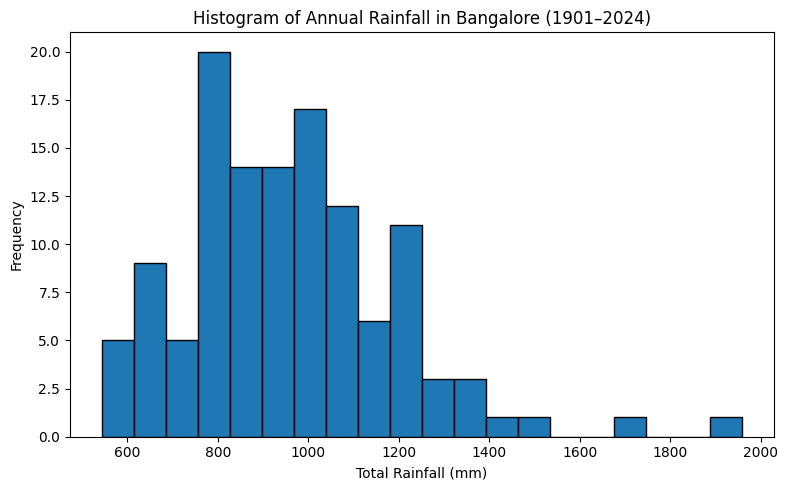

In [78]:
import matplotlib.pyplot as plt

# Drop missing values
total_rain = df['Total'].dropna()

plt.figure(figsize=(8, 5))
plt.hist(total_rain, bins=20, edgecolor='black')

plt.title('Histogram of Annual Rainfall in Bangalore (1901–2024)')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


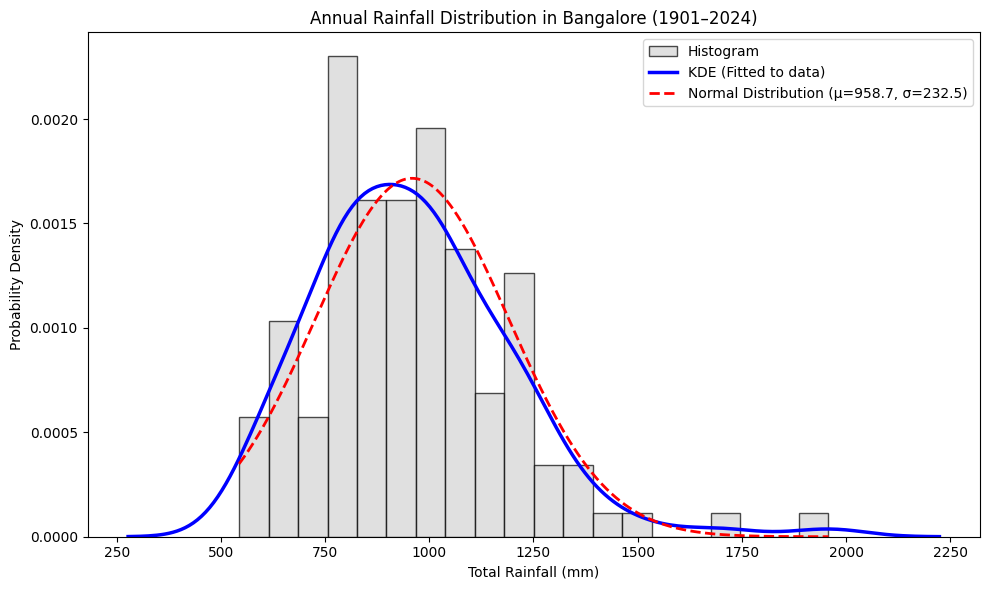

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Annual rainfall data
annual_rain = df['Total'].dropna()

# Mean and standard deviation
mu = annual_rain.mean()
sigma = annual_rain.std()

# X range
x = np.linspace(annual_rain.min(), annual_rain.max(), 500)

# Normal PDF
normal_pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))

# Histogram (density normalized)
plt.hist(
    annual_rain,
    bins=20,
    density=True,
    color='lightgray',
    edgecolor='black',
    alpha=0.7,
    label='Histogram'
)

# KDE curve (fitted to data)
sns.kdeplot(
    annual_rain,
    color='blue',
    linewidth=2.5,
    label='KDE (Fitted to data)'
)

# Normal distribution curve
plt.plot(
    x,
    normal_pdf,
    'r--',
    linewidth=2,
    label=f'Normal Distribution (μ={mu:.1f}, σ={sigma:.1f})'
)

plt.title('Annual Rainfall Distribution in Bangalore (1901–2024)')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


In [80]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Total'],
      dtype='object')

In [81]:
import pandas as pd

# Load the dataset
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-unmodified.csv")

# Display structure and first few rows
print(df.info())
print(df.head())

# Summary statistics
print(df.describe())

import pandas as pd
print(df.head())
print(df.columns)

# Set Year as index directly
df.set_index('Year', inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop Total column
df_months = df.drop(columns=['Total'])

# Coefficient of Variation
monthly_cv = (df_months.std() / df_months.mean()) * 100

most_variable_month = monthly_cv.idxmax()
least_variable_month = monthly_cv.idxmin()

print("Most Variable Month:", most_variable_month)
print("Least Variable Month:", least_variable_month)

print("\nCoefficient of Variation (%):")
print(monthly_cv.round(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    124 non-null    int64  
 1   Jan     124 non-null    float64
 2   Feb     124 non-null    float64
 3   Mar     124 non-null    float64
 4   Apr     124 non-null    float64
 5   May     124 non-null    float64
 6   June    124 non-null    float64
 7   July    124 non-null    float64
 8   Aug     124 non-null    float64
 9   Sept    124 non-null    float64
 10  Oct     123 non-null    float64
 11  Nov     123 non-null    float64
 12  Dec     122 non-null    float64
 13  Total   123 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.7 KB
None
   Year  Jan   Feb   Mar   Apr    May   June   July    Aug   Sept    Oct  \
0  1901  0.0  78.9   0.0  24.3  146.0   47.7   71.6   71.6  318.5  120.3   
1  1902  0.7   0.0  17.0  58.1  197.8   62.2   32.0   79.5  213.6  219.9   
2  1903  0.0   0.0

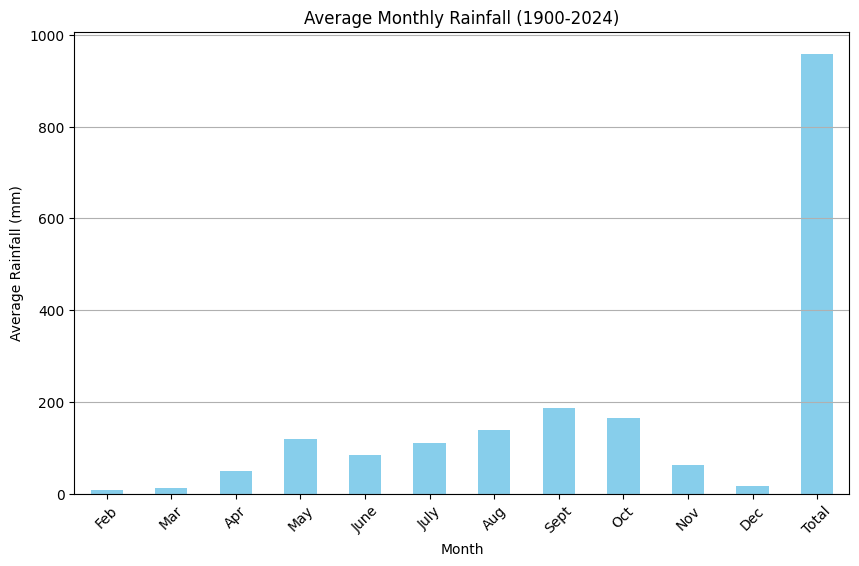

In [82]:
# Calculate monthly average rainfall
monthly_avg = df.iloc[:, 1:].mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title("Average Monthly Rainfall (1900-2024)")
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


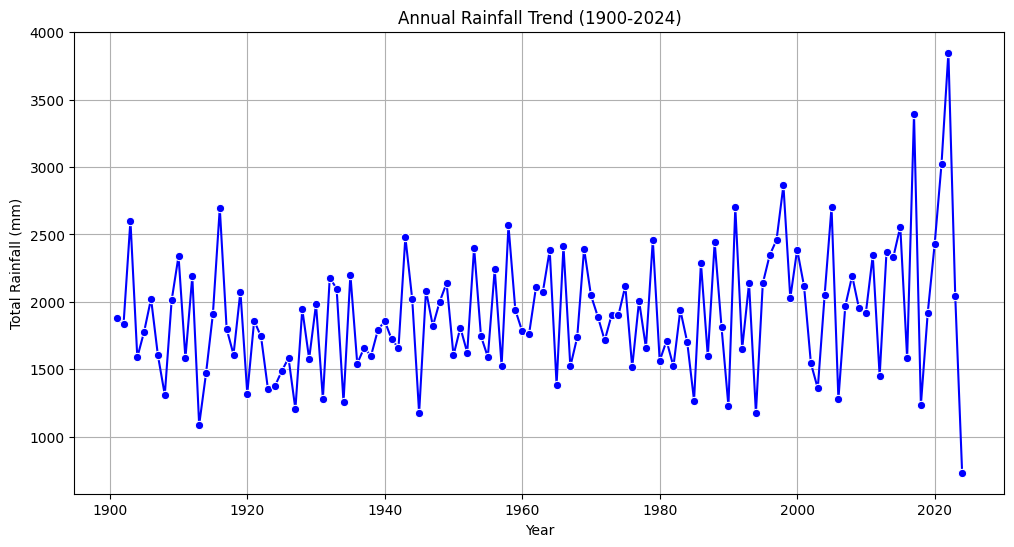

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load the dataset
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-unmodified.csv")

# Plot annual rainfall trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df.iloc[:, 1:].sum(axis=1), marker="o", color="b")
plt.title("Annual Rainfall Trend (1900-2024)")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.grid()
plt.show()


In [84]:
# If 'Total' exists, use it
if 'Total' in df.columns:
    annual_rain = df['Total']
else:
    annual_rain = df.sum(axis=1)


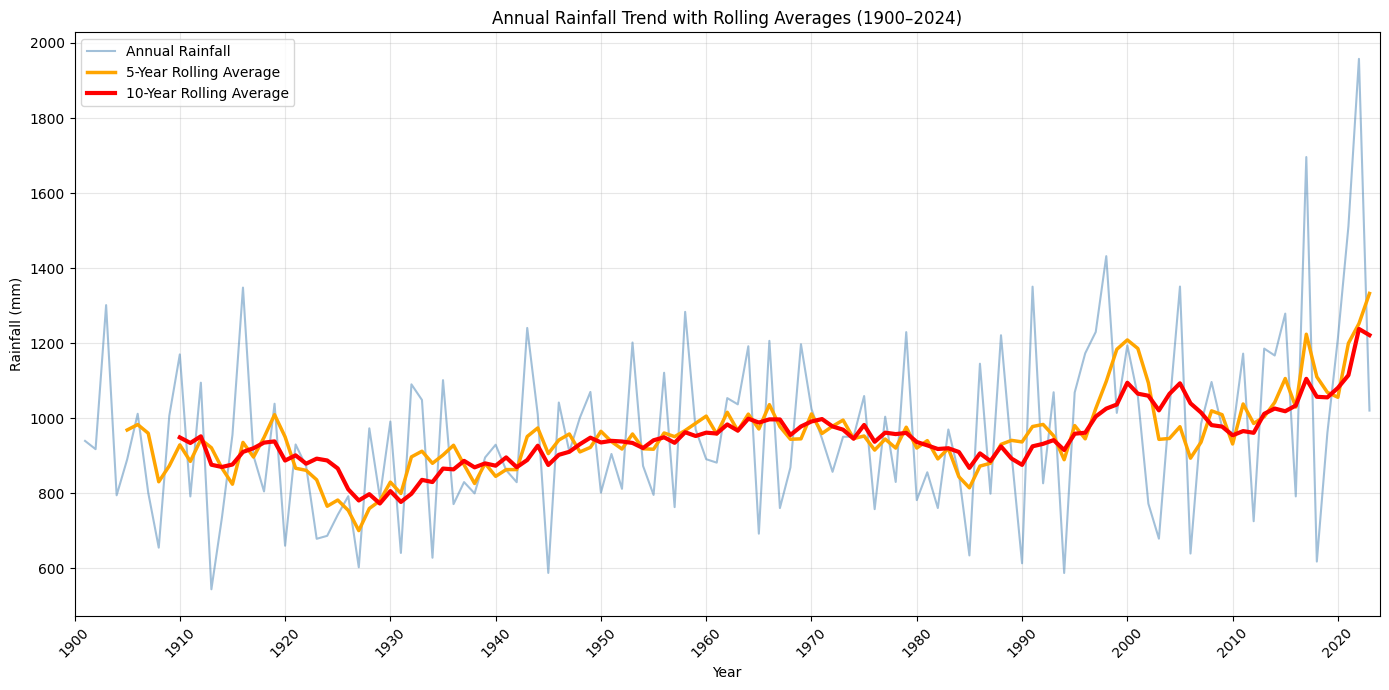

In [85]:
import matplotlib.pyplot as plt

# Annual rainfall
annual_rain = df['Total']

# Rolling averages
rolling_5yr = annual_rain.rolling(window=5).mean()
rolling_10yr = annual_rain.rolling(window=10).mean()

plt.figure(figsize=(14, 7))

# Plot using Year column
plt.plot(df['Year'], annual_rain,
         label='Annual Rainfall',
         color='steelblue',
         alpha=0.5)

plt.plot(df['Year'], rolling_5yr,
         label='5-Year Rolling Average',
         color='orange',
         linewidth=2.5)

plt.plot(df['Year'], rolling_10yr,
         label='10-Year Rolling Average',
         color='red',
         linewidth=3)

plt.title('Annual Rainfall Trend with Rolling Averages (1900–2024)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

# Force year range and ticks
plt.xlim(1900, 2024)
plt.xticks(range(1900, 2025, 10), rotation=45)

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [86]:
# Top 5 wettest years
top_5_wettest_years = df.nlargest(5, 'Total')
print("Top 5 Wettest Years:\n", top_5_wettest_years[['Year', 'Total']])

# Top 5 driest years
top_5_driest_years = df.nsmallest(5, 'Total')
print("Top 5 Driest Years:\n", top_5_driest_years[['Year', 'Total']])

Top 5 Wettest Years:
      Year   Total
121  2022  1957.7
116  2017  1696.0
120  2021  1511.1
97   1998  1431.8
104  2005  1350.8
Top 5 Driest Years:
     Year  Total
12  1913  543.8
93  1994  587.2
44  1945  587.4
26  1927  602.5
89  1990  613.1


Jan       4.358065
Feb       7.439516
Mar      11.484677
Apr      50.041129
May     118.364516
June     84.793548
July    111.095161
Aug     139.916935
Sept    187.126613
Oct     164.631707
Nov      62.243902
Dec      16.936885
dtype: float64


C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\3598532781.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


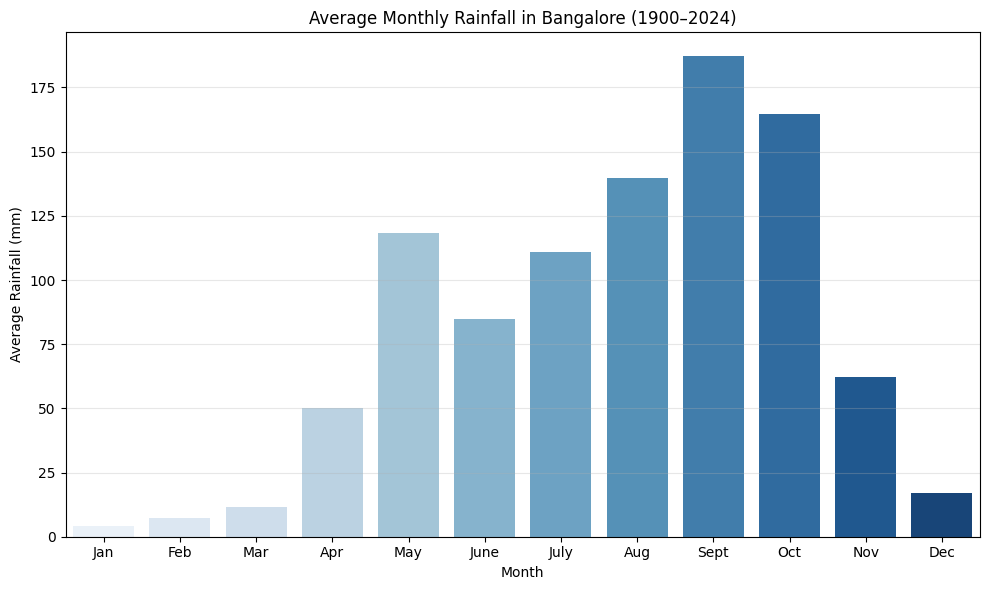

In [87]:
# List of month columns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
          'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Ensure numeric
df[months] = df[months].apply(pd.to_numeric, errors='coerce')

# Calculate monthly mean rainfall
monthly_avg = df[months].mean()

print(monthly_avg)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(
    x=monthly_avg.index,
    y=monthly_avg.values,
    palette='Blues'
)

plt.title('Average Monthly Rainfall in Bangalore (1900–2024)')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


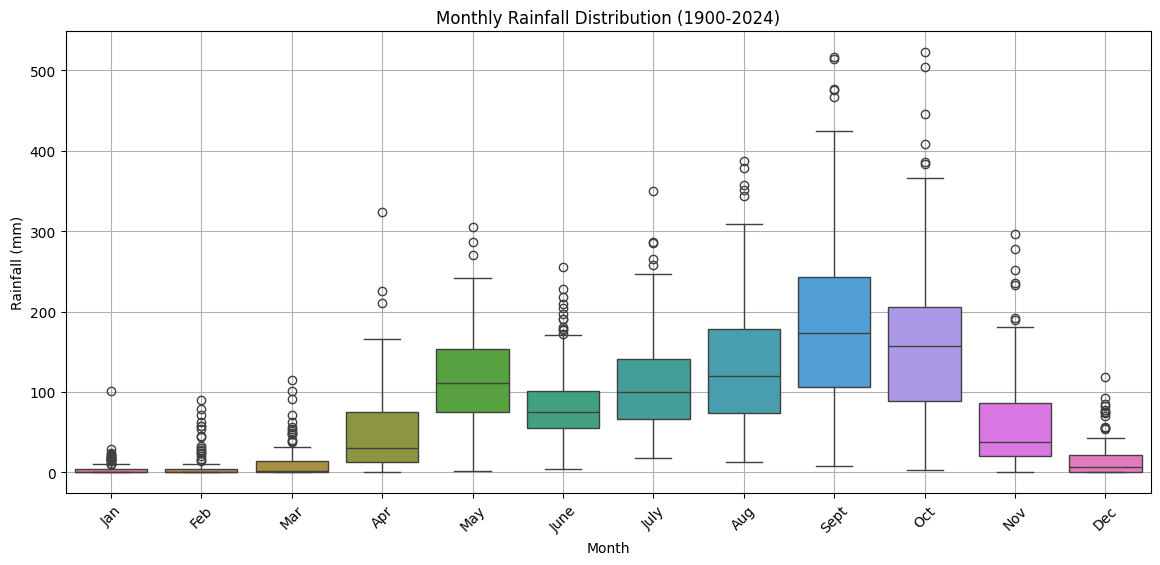

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-unmodified.csv")

# Calculate total annual rainfall
df['Total'] = df.iloc[:, 1:13].sum(axis=1)
df['5yr_Rolling'] = df['Total'].rolling(5).mean()
df['10yr_Rolling'] = df['Total'].rolling(10).mean()

# --- Plot 1: Monthly rainfall distribution ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.iloc[:, 1:13])
plt.title("Monthly Rainfall Distribution (1900-2024)")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()






In [74]:
import pandas as pd

# Load the dataset
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-unmodified.csv")


# Set Year as index directly
df.set_index('Year', inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop Total column
df_months = df.drop(columns=['Total'])

# Coefficient of Variation
monthly_cv = (df_months.std() / df_months.mean()) * 100

most_variable_month = monthly_cv.idxmax()
least_variable_month = monthly_cv.idxmin()

print("Most Variable Month:", most_variable_month)
print("Least Variable Month:", least_variable_month)

print("\nCoefficient of Variation (%):")
print(monthly_cv.round(2))


Most Variable Month: Jan
Least Variable Month: May

Coefficient of Variation (%):
Jan     251.00
Feb     232.80
Mar     183.77
Apr     104.44
May      49.14
June     59.85
July     56.20
Aug      61.29
Sept     56.91
Oct      62.27
Nov     103.18
Dec     137.43
dtype: float64


In [95]:
import pandas as pd

# Load the dataset
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-modified.csv")

# Display structure and first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Display number of null values per column
print("\nNull values per column:")
print(df.isnull().sum())


   Year  Jan   Feb   Mar   Apr    May   June   July    Aug   Sept    Oct  \
0  1901  NaN  78.9   0.0  24.3  146.0  238.5   71.6   71.6  318.5    NaN   
1  1902  0.7   0.0  85.0   NaN  197.8   62.2    NaN    NaN    NaN  219.9   
2  1903  NaN   0.0   0.0   1.5   63.7  109.2    NaN  189.7  475.2  171.1   
3  1904  0.5   0.0   NaN   NaN  241.5    NaN  149.3   53.8  126.4  157.2   
4  1905  1.7   NaN  56.6  32.7   90.6   60.7   58.9    NaN   62.4  227.8   

     Nov   Dec  
0   37.3  23.1  
1   11.1  25.4  
2  233.6  29.4  
3    0.0   1.7  
4   29.2   3.0  
              Year         Jan        Feb         Mar          Apr  \
count   124.000000  105.000000  96.000000  103.000000    98.000000   
mean   1962.500000    7.563810   8.246875   15.376699    97.380612   
std      35.939764   18.370687  17.562328   26.254618   214.010372   
min    1901.000000    0.000000   0.000000    0.000000     0.000000   
25%    1931.750000    0.000000   0.000000    0.000000    17.325000   
50%    1962.500000   

In [96]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Check for NaN values in the entire DataFrame
nan_values = df.isna()

# Print the result to see where NaN values are located
print("NaN values in the dataset:")
print(nan_values)

# Optionally, you can count the NaN values per column
nan_counts = df.isna().sum()
print("\nCount of NaN values per column:")
print(nan_counts)


NaN values in the dataset:
      Year    Jan    Feb    Mar    Apr    May   June   July    Aug   Sept  \
0    False   True  False  False  False  False  False  False  False  False   
1    False  False  False  False   True  False  False   True   True   True   
2    False   True  False  False  False  False  False   True  False  False   
3    False  False  False   True   True  False   True  False  False  False   
4    False  False   True  False  False  False  False  False   True  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
119  False  False  False  False  False  False  False  False  False  False   
120  False  False   True  False  False  False  False  False  False  False   
121  False  False  False  False  False  False  False  False   True  False   
122  False  False  False   True  False  False  False  False   True  False   
123  False  False   True   True  False   True  False  False   True  False   

       Oct    Nov    Dec  
0     True  False  Fa

In [99]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Step 1: Calculate the mean of each month (column) across all years
monthly_mean = df.mean()

# Step 2: Impute missing values using different methods

# Method 1: Mean Imputation
df_mean_imputed = df.fillna(monthly_mean)

# Method 2: Median Imputation
df_median_imputed = df.fillna(df.median())

# Method 3: Forward Fill
df_ffill_imputed = df.fillna(method='ffill')

# Method 4: Backward Fill
df_bfill_imputed = df.fillna(method='bfill')

# Step 3: Compare the impact by looking at changes in data after imputation

# Displaying the number of NaN values before and after imputation
print("NaN values before imputation (per column):")
print(df.isna().sum())
print("Total NaN values before imputation:", df.isna().sum().sum())

print("\nNaN values after mean imputation (per column):")
print(df_mean_imputed.isna().sum())
print("Total NaN values after mean imputation:", df_mean_imputed.isna().sum().sum())

print("\nNaN values after median imputation (per column):")
print(df_median_imputed.isna().sum())
print("Total NaN values after median imputation:", df_median_imputed.isna().sum().sum())

print("\nNaN values after forward fill (per column):")
print(df_ffill_imputed.isna().sum())
print("Total NaN values after forward fill:", df_ffill_imputed.isna().sum().sum())

print("\nNaN values after backward fill (per column):")
print(df_bfill_imputed.isna().sum())
print("Total NaN values after backward fill:", df_bfill_imputed.isna().sum().sum())

# Compare the mean of the imputed data vs original data
print("\nMean of the original data before imputation:")
print(df.mean())

print("\nMean after mean imputation:")
print(df_mean_imputed.mean())

print("\nMean after median imputation:")
print(df_median_imputed.mean())

print("\nMean after forward fill:")
print(df_ffill_imputed.mean())

print("\nMean after backward fill:")
print(df_bfill_imputed.mean())


NaN values before imputation (per column):
Year     0
Jan     19
Feb     28
Mar     21
Apr     26
May     26
June    23
July    26
Aug     23
Sept    26
Oct     31
Nov      1
Dec      2
dtype: int64
Total NaN values before imputation: 252

NaN values after mean imputation (per column):
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     0
dtype: int64
Total NaN values after mean imputation: 0

NaN values after median imputation (per column):
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     0
dtype: int64
Total NaN values after median imputation: 0

NaN values after forward fill (per column):
Year    0
Jan     1
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     1
Nov     0
Dec     0
dtype: int64
Total NaN values after forward fill: 2

NaN values after backward fill (per column):
Year    0
Jan     

C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\3789826707.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill_imputed = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\3789826707.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill_imputed = df.fillna(method='bfill')


C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\2618673364.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill_imputed = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\2618673364.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill_imputed = df.fillna(method='bfill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\2618673364.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(data_to_plot, labels=labels, patch_artist=True)


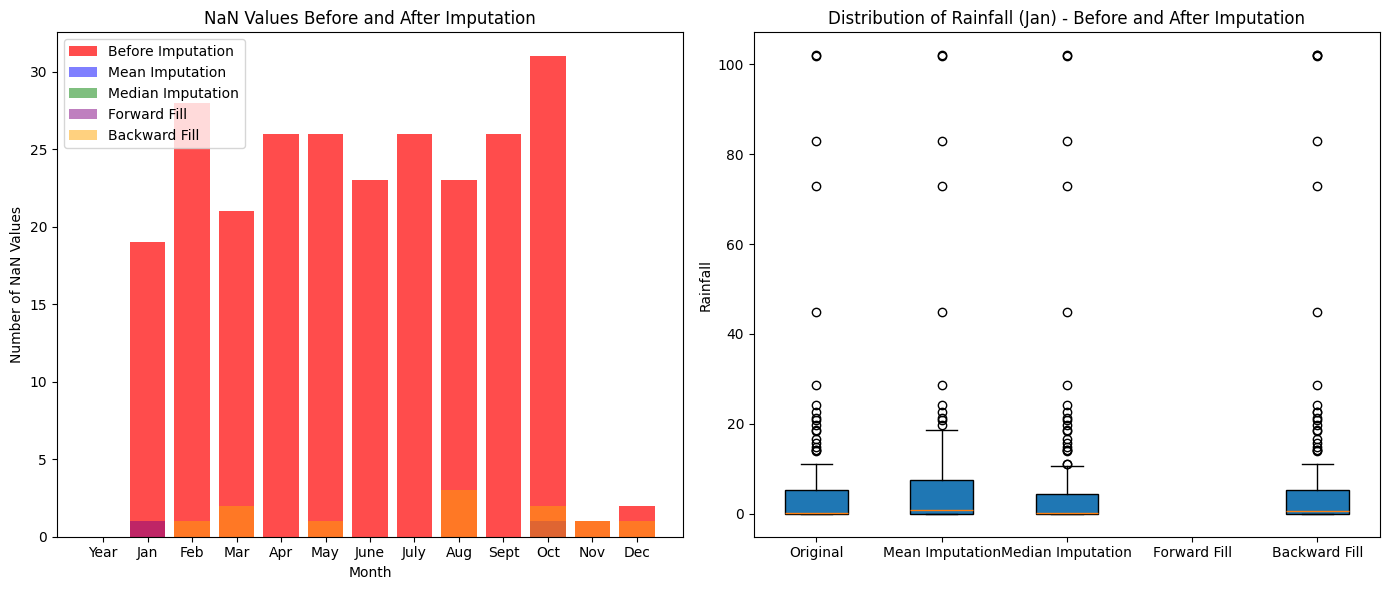

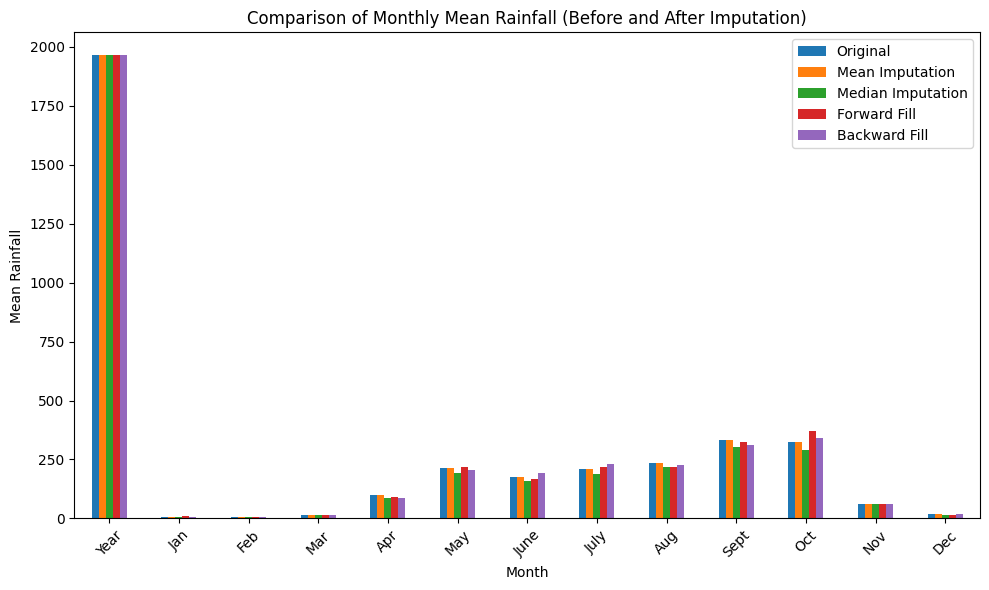

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Step 1: Calculate the mean of each month (column) across all years (row-wise)
monthly_mean = df.mean()

# Step 2: Impute missing values using different methods

# Method 1: Mean Imputation
df_mean_imputed = df.fillna(monthly_mean)

# Method 2: Median Imputation
df_median_imputed = df.fillna(df.median())

# Method 3: Forward Fill
df_ffill_imputed = df.fillna(method='ffill')

# Method 4: Backward Fill
df_bfill_imputed = df.fillna(method='bfill')

# Step 3: Compare the impact visually

# Plot 1: NaN values before and after imputation
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before imputation
df_nan_before = df.isna().sum()
df_nan_after_mean = df_mean_imputed.isna().sum()
df_nan_after_median = df_median_imputed.isna().sum()
df_nan_after_ffill = df_ffill_imputed.isna().sum()
df_nan_after_bfill = df_bfill_imputed.isna().sum()

# Bar plot for NaN counts before and after imputation
ax[0].bar(df_nan_before.index, df_nan_before.values, label='Before Imputation', color='red', alpha=0.7)
ax[0].bar(df_nan_after_mean.index, df_nan_after_mean.values, label='Mean Imputation', color='blue', alpha=0.5)
ax[0].bar(df_nan_after_median.index, df_nan_after_median.values, label='Median Imputation', color='green', alpha=0.5)
ax[0].bar(df_nan_after_ffill.index, df_nan_after_ffill.values, label='Forward Fill', color='purple', alpha=0.5)
ax[0].bar(df_nan_after_bfill.index, df_nan_after_bfill.values, label='Backward Fill', color='orange', alpha=0.5)

ax[0].set_title('NaN Values Before and After Imputation')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of NaN Values')
ax[0].legend()

# Plot 2: Distribution (Boxplot) before and after imputation for one column (e.g., January)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_jan = df['Jan']
df_jan_mean_imputed = df_mean_imputed['Jan']
df_jan_median_imputed = df_median_imputed['Jan']
df_jan_ffill_imputed = df_ffill_imputed['Jan']
df_jan_bfill_imputed = df_bfill_imputed['Jan']

data_to_plot = [df_jan.dropna(), df_jan_mean_imputed, df_jan_median_imputed, df_jan_ffill_imputed, df_jan_bfill_imputed]
labels = ['Original', 'Mean Imputation', 'Median Imputation', 'Forward Fill', 'Backward Fill']

ax[1].boxplot(data_to_plot, labels=labels, patch_artist=True)
ax[1].set_title('Distribution of Rainfall (Jan) - Before and After Imputation')
ax[1].set_ylabel('Rainfall')

plt.tight_layout()
plt.show()

# Step 4: Compare the mean values before and after imputation (Bar Chart)
mean_values = {
    'Original': df.mean(),
    'Mean Imputation': df_mean_imputed.mean(),
    'Median Imputation': df_median_imputed.mean(),
    'Forward Fill': df_ffill_imputed.mean(),
    'Backward Fill': df_bfill_imputed.mean()
}

# Create a DataFrame for easy plotting
mean_df = pd.DataFrame(mean_values)

# Plot the comparison of means
mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Monthly Mean Rainfall (Before and After Imputation)')
plt.ylabel('Mean Rainfall')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\2204627018.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill_imputed = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\2204627018.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill_imputed = df.fillna(method='bfill')


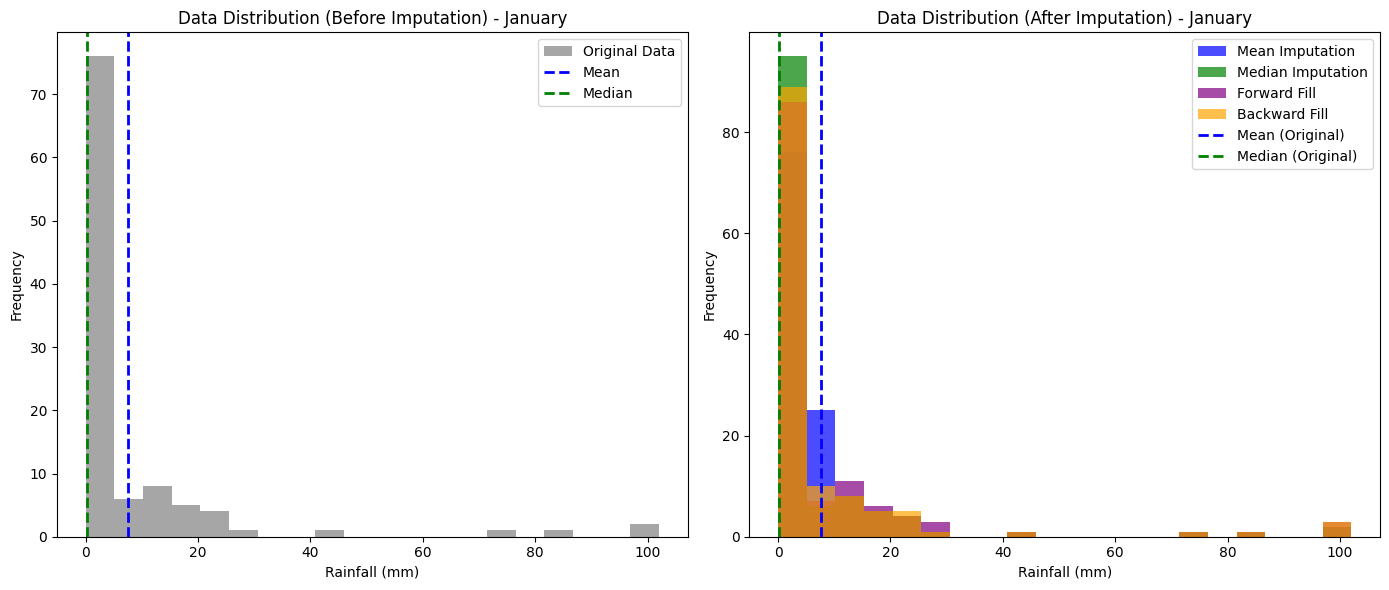

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Step 1: Calculate the mean and median of each month (column) across all years (row-wise)
monthly_mean = df.mean()
monthly_median = df.median()

# Step 2: Impute missing values using different methods

# Method 1: Mean Imputation
df_mean_imputed = df.fillna(monthly_mean)

# Method 2: Median Imputation
df_median_imputed = df.fillna(df.median())

# Method 3: Forward Fill
df_ffill_imputed = df.fillna(method='ffill')

# Method 4: Backward Fill
df_bfill_imputed = df.fillna(method='bfill')

# Plotting the original data (before imputation)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original Data Distribution - January (before imputation)
ax[0].hist(df['Jan'].dropna(), bins=20, alpha=0.7, color='gray', label='Original Data')
ax[0].axvline(df['Jan'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean')
ax[0].axvline(df['Jan'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
ax[0].set_title('Data Distribution (Before Imputation) - January')
ax[0].set_xlabel('Rainfall (mm)')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Plotting the imputed data (after imputation)

# Imputed Data Distribution - January (after imputation)
ax[1].hist(df_mean_imputed['Jan'], bins=20, alpha=0.7, color='blue', label='Mean Imputation')
ax[1].hist(df_median_imputed['Jan'], bins=20, alpha=0.7, color='green', label='Median Imputation')
ax[1].hist(df_ffill_imputed['Jan'], bins=20, alpha=0.7, color='purple', label='Forward Fill')
ax[1].hist(df_bfill_imputed['Jan'], bins=20, alpha=0.7, color='orange', label='Backward Fill')
ax[1].axvline(df['Jan'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean (Original)')
ax[1].axvline(df['Jan'].median(), color='green', linestyle='dashed', linewidth=2, label='Median (Original)')
ax[1].set_title('Data Distribution (After Imputation) - January')
ax[1].set_xlabel('Rainfall (mm)')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()



Missing data count per column:
 Year     0
Jan     19
Feb     28
Mar     21
Apr     26
May     26
June    23
July    26
Aug     23
Sept    26
Oct     31
Nov      1
Dec      2
dtype: int64


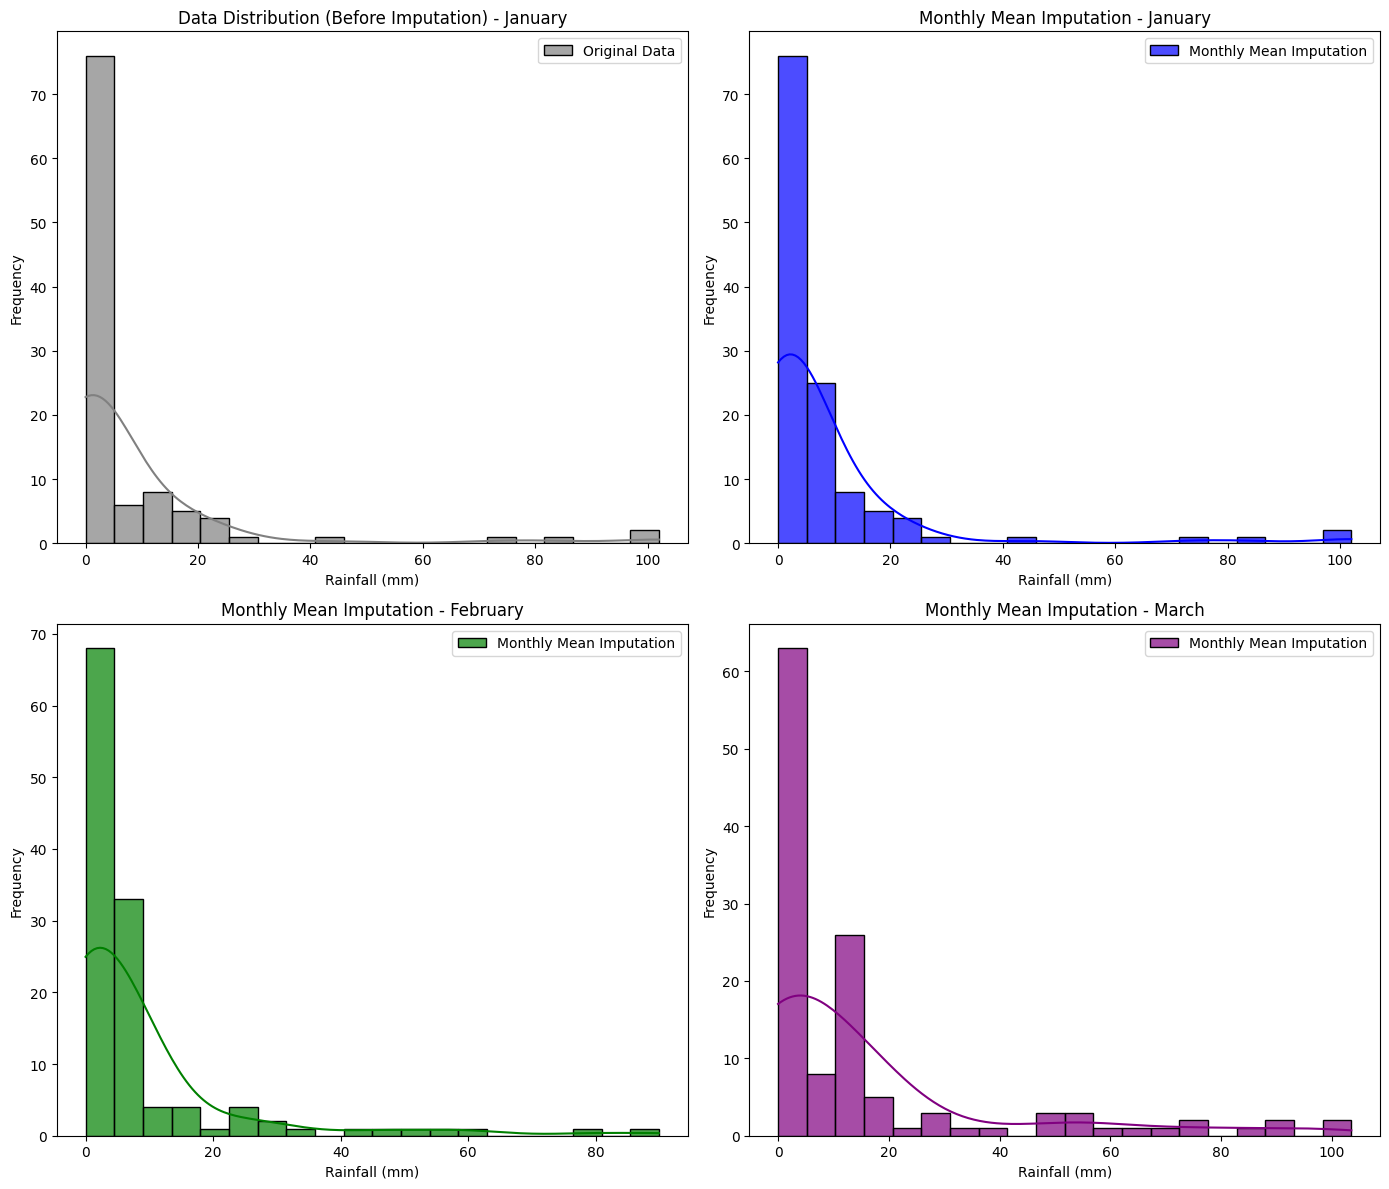

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Check the missing values in the data
missing_data = df.isnull().sum()
print("Missing data count per column:\n", missing_data)

# Step 1: Calculate the monthly mean (average) for each month (column)
monthly_mean = df.mean()

# Step 2: Impute missing values with the corresponding monthly mean
df_monthly_imputed = df.apply(lambda col: col.fillna(monthly_mean[col.name]), axis=0)

# Plotting the original data (before imputation) vs imputed data (after imputation)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Original Data Distribution - January (before imputation)
sns.histplot(df['Jan'], bins=20, color='gray', kde=True, ax=ax[0, 0], label='Original Data', alpha=0.7)
ax[0, 0].set_title('Data Distribution (Before Imputation) - January')
ax[0, 0].set_xlabel('Rainfall (mm)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].legend()

# Monthly Mean Imputation Data Distribution - January (after imputation)
sns.histplot(df_monthly_imputed['Jan'], bins=20, color='blue', kde=True, ax=ax[0, 1], label='Monthly Mean Imputation', alpha=0.7)
ax[0, 1].set_title('Monthly Mean Imputation - January')
ax[0, 1].set_xlabel('Rainfall (mm)')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].legend()

# Median Imputation Data Distribution - January (after imputation)
sns.histplot(df_monthly_imputed['Feb'], bins=20, color='green', kde=True, ax=ax[1, 0], label='Monthly Mean Imputation', alpha=0.7)
ax[1, 0].set_title('Monthly Mean Imputation - February')
ax[1, 0].set_xlabel('Rainfall (mm)')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].legend()

# Forward Fill Data Distribution - January (after imputation)
sns.histplot(df_monthly_imputed['Mar'], bins=20, color='purple', kde=True, ax=ax[1, 1], label='Monthly Mean Imputation', alpha=0.7)
ax[1, 1].set_title('Monthly Mean Imputation - March')
ax[1, 1].set_xlabel('Rainfall (mm)')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

plt.tight_layout()
plt.show()


Missing data count per column:
 Year     0
Jan     19
Feb     28
Mar     21
Apr     26
May     26
June    23
July    26
Aug     23
Sept    26
Oct     31
Nov      1
Dec      2
dtype: int64

Rows with missing data:
      Year   Jan   Feb   Mar    Apr    May    June   July    Aug    Sept  \
0    1901   NaN  78.9   0.0   24.3  146.0   238.5   71.6   71.6   318.5   
1    1902   0.7   0.0  85.0    NaN  197.8    62.2    NaN    NaN     NaN   
2    1903   NaN   0.0   0.0    1.5   63.7   109.2    NaN  189.7   475.2   
3    1904   0.5   0.0   NaN    NaN  241.5     NaN  149.3   53.8   126.4   
4    1905   1.7   NaN  56.6   32.7   90.6    60.7   58.9    NaN    62.4   
..    ...   ...   ...   ...    ...    ...     ...    ...    ...     ...   
119  2020   0.0   0.0  18.4  121.1  128.6  1148.0  158.3   75.9   300.0   
120  2021  21.2   NaN   0.0  118.2  130.7    91.1  203.3   98.3   942.5   
121  2022   3.9   0.0   0.0  614.0  270.2   255.5  136.7    NaN  1765.0   
122  2023   0.0   0.0   NaN  141.0  

C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\18273797.py:72: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\18273797.py:80: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


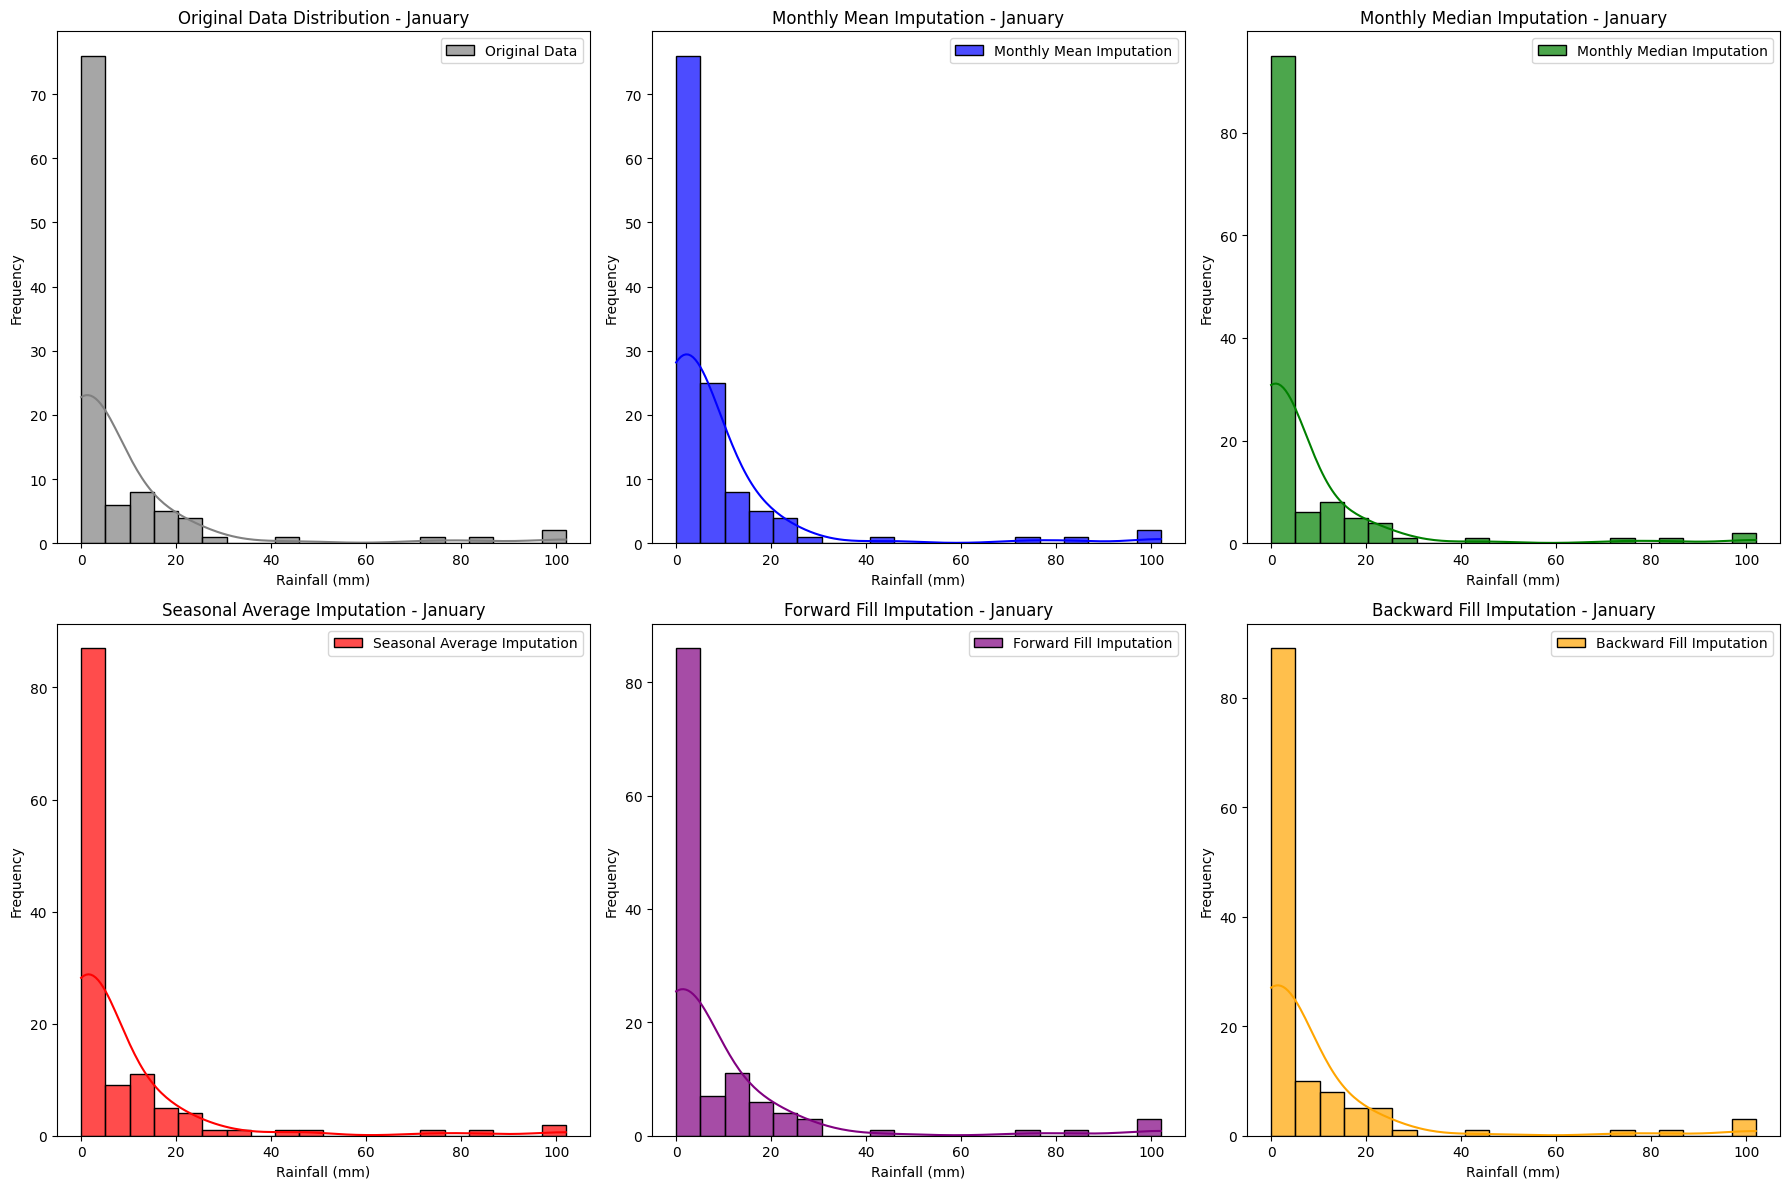

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Step 1: Identify missing values and their locations
missing_data = df.isnull().sum()
missing_locations = df[df.isnull().any(axis=1)]  # Rows with any missing values

print("Missing data count per column:\n", missing_data)
print("\nRows with missing data:\n", missing_locations)

# Step 2: Define imputation methods
def impute_monthly_mean(df):
    monthly_mean = df.mean()
    return df.apply(lambda col: col.fillna(monthly_mean[col.name]), axis=0)

def impute_monthly_median(df):
    monthly_median = df.median()
    return df.apply(lambda col: col.fillna(monthly_median[col.name]), axis=0)

def impute_seasonal_average(df, months=2):
    seasonal_avg = df.copy()
    for col in df.columns[1:]:  # Skip the 'Year' column
        for idx in df.index:
            if pd.isnull(df.at[idx, col]):  # If the value is missing
                start_idx = max(0, idx - months)  # Calculate the range for seasonal average
                end_idx = min(len(df), idx + months + 1)
                seasonal_avg.at[idx, col] = df.iloc[start_idx:end_idx][col].mean()  # Take mean from surrounding months
    return seasonal_avg

# Step 3: Impute missing values using different strategies
df_monthly_mean = impute_monthly_mean(df)
df_monthly_median = impute_monthly_median(df)
df_seasonal_avg = impute_seasonal_average(df)

# Step 4: Plotting the distributions of missing and imputed data
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Before Imputation - January
sns.histplot(df['Jan'], bins=20, color='gray', kde=True, ax=ax[0, 0], label='Original Data', alpha=0.7)
ax[0, 0].set_title('Original Data Distribution - January')
ax[0, 0].set_xlabel('Rainfall (mm)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].legend()

# After Imputation (Monthly Mean) - January
sns.histplot(df_monthly_mean['Jan'], bins=20, color='blue', kde=True, ax=ax[0, 1], label='Monthly Mean Imputation', alpha=0.7)
ax[0, 1].set_title('Monthly Mean Imputation - January')
ax[0, 1].set_xlabel('Rainfall (mm)')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].legend()

# After Imputation (Monthly Median) - January
sns.histplot(df_monthly_median['Jan'], bins=20, color='green', kde=True, ax=ax[0, 2], label='Monthly Median Imputation', alpha=0.7)
ax[0, 2].set_title('Monthly Median Imputation - January')
ax[0, 2].set_xlabel('Rainfall (mm)')
ax[0, 2].set_ylabel('Frequency')
ax[0, 2].legend()

# After Imputation (Seasonal Average) - January
sns.histplot(df_seasonal_avg['Jan'], bins=20, color='red', kde=True, ax=ax[1, 0], label='Seasonal Average Imputation', alpha=0.7)
ax[1, 0].set_title('Seasonal Average Imputation - January')
ax[1, 0].set_xlabel('Rainfall (mm)')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].legend()

# After Imputation (Forward Fill) - January
df_ffill = df.fillna(method='ffill')
sns.histplot(df_ffill['Jan'], bins=20, color='purple', kde=True, ax=ax[1, 1], label='Forward Fill Imputation', alpha=0.7)
ax[1, 1].set_title('Forward Fill Imputation - January')
ax[1, 1].set_xlabel('Rainfall (mm)')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

# After Imputation (Backward Fill) - January
df_bfill = df.fillna(method='bfill')
sns.histplot(df_bfill['Jan'], bins=20, color='orange', kde=True, ax=ax[1, 2], label='Backward Fill Imputation', alpha=0.7)
ax[1, 2].set_title('Backward Fill Imputation - January')
ax[1, 2].set_xlabel('Rainfall (mm)')
ax[1, 2].set_ylabel('Frequency')
ax[1, 2].legend()

plt.tight_layout()
plt.show()


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Step 1: Define imputation methods
def impute_monthly_mean(df):
    monthly_mean = df.mean()
    return df.apply(lambda col: col.fillna(monthly_mean[col.name]), axis=0)

def impute_monthly_median(df):
    monthly_median = df.median()
    return df.apply(lambda col: col.fillna(monthly_median[col.name]), axis=0)

def impute_seasonal_average(df, months=2):
    seasonal_avg = df.copy()
    for col in df.columns[1:]:  # Skip the 'Year' column
        for idx in df.index:
            if pd.isnull(df.at[idx, col]):  # If the value is missing
                start_idx = max(0, idx - months)  # Calculate the range for seasonal average
                end_idx = min(len(df), idx + months + 1)
                seasonal_avg.at[idx, col] = df.iloc[start_idx:end_idx][col].mean()  # Take mean from surrounding months
    return seasonal_avg

# Step 2: Impute missing values using different strategies
df_monthly_mean = impute_monthly_mean(df)
df_monthly_median = impute_monthly_median(df)
df_seasonal_avg = impute_seasonal_average(df)

# Step 3: Forward and Backward Fill
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')

# Step 4: Check for missing values before and after imputation
def check_missing_values(df, method_name):
    missing_values = df.isna().sum().sum()
    print(f'Missing values after {method_name} imputation: {missing_values}')

# Check missing values in original data
missing_original = df.isna().sum().sum()
print(f'Missing values in original data: {missing_original}')

# Check missing values after imputation
check_missing_values(df_monthly_mean, "Monthly Mean")
check_missing_values(df_monthly_median, "Monthly Median")
check_missing_values(df_seasonal_avg, "Seasonal Average")
check_missing_values(df_ffill, "Forward Fill")
check_missing_values(df_bfill, "Backward Fill")


Missing values in original data: 252
Missing values after Monthly Mean imputation: 0
Missing values after Monthly Median imputation: 0
Missing values after Seasonal Average imputation: 1
Missing values after Forward Fill imputation: 2
Missing values after Backward Fill imputation: 11


C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\3072622713.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\3072622713.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


In [107]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Checking for missing values
missing_values = df.isnull().sum()

# Imputation Methods
df_mean_imputed = df.fillna(df.mean())
df_median_imputed = df.fillna(df.median())
df_seasonal_avg_imputed = df.copy()

# Implementing Seasonal Average imputation
for col in df.columns[1:-1]:  # Skip Year and Total columns
    for i in range(1, len(df)):
        if pd.isnull(df_seasonal_avg_imputed.at[i, col]):
            # Average of the ±2 months (handling edge cases)
            prev_month = df_seasonal_avg_imputed[col].iloc[max(i-2, 0):i].mean()
            next_month = df_seasonal_avg_imputed[col].iloc[i+1:min(i+3, len(df))].mean()
            seasonal_avg = np.mean([prev_month, next_month])
            df_seasonal_avg_imputed.at[i, col] = seasonal_avg

# Forward Fill imputation
df_forward_fill_imputed = df.fillna(method='ffill')

# Backward Fill imputation
df_backward_fill_imputed = df.fillna(method='bfill')

# Function to calculate mean, median, and variance
def calculate_stats(df):
    stats = {
        'Mean': df.mean(),
        'Median': df.median(),
        'Variance': df.var()
    }
    return pd.DataFrame(stats)

# Calculate stats for original and imputed data
original_stats = calculate_stats(df)
mean_imputed_stats = calculate_stats(df_mean_imputed)
median_imputed_stats = calculate_stats(df_median_imputed)
seasonal_avg_imputed_stats = calculate_stats(df_seasonal_avg_imputed)
forward_fill_imputed_stats = calculate_stats(df_forward_fill_imputed)
backward_fill_imputed_stats = calculate_stats(df_backward_fill_imputed)

# Combine all the statistics into one DataFrame
stats_comparison = pd.concat([
    original_stats['Mean'],
    original_stats['Median'],
    original_stats['Variance'],
    mean_imputed_stats['Mean'],
    median_imputed_stats['Mean'],
    seasonal_avg_imputed_stats['Mean'],
    forward_fill_imputed_stats['Mean'],
    backward_fill_imputed_stats['Mean']
], axis=1)

# Rename columns for clarity
stats_comparison.columns = [
    'Original Mean', 'Original Median', 'Original Variance',
    'Monthly Mean Imputation', 'Monthly Median Imputation',
    'Seasonal Average Imputation', 'Forward Fill Imputation', 'Backward Fill Imputation'
]

# Display the result
print(stats_comparison)


      Original Mean  Original Median  Original Variance  \
Year    1962.500000          1962.50        1291.666667   
Jan        7.563810             0.20         337.482139   
Feb        8.246875             0.00         308.435359   
Mar       15.376699             1.50         689.304942   
Apr       97.380612            41.65       45800.439311   
May      215.868367           115.40      102916.198886   
June     176.191089            84.20      118477.259820   
July     211.617347           111.25       92992.110933   
Aug      235.678218           132.30      180049.569521   
Sept     333.835714           183.75      359879.624794   
Oct      325.777419           184.60      236166.425898   
Nov       62.243902            37.30        4124.738876   
Dec       16.936885             7.25         541.749785   

      Monthly Mean Imputation  Monthly Median Imputation  \
Year              1962.500000                1962.500000   
Jan                  7.563810                   6.435

C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\2504139440.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_forward_fill_imputed = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\2504139440.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_backward_fill_imputed = df.fillna(method='bfill')


Missing data count per column:
 Year     0
Jan     19
Feb     28
Mar     21
Apr     26
May     26
June    23
July    26
Aug     23
Sept    26
Oct     31
Nov      1
Dec      2
dtype: int64

Rows with missing data:
      Year   Jan   Feb   Mar    Apr    May    June   July    Aug    Sept  \
0    1901   NaN  78.9   0.0   24.3  146.0   238.5   71.6   71.6   318.5   
1    1902   0.7   0.0  85.0    NaN  197.8    62.2    NaN    NaN     NaN   
2    1903   NaN   0.0   0.0    1.5   63.7   109.2    NaN  189.7   475.2   
3    1904   0.5   0.0   NaN    NaN  241.5     NaN  149.3   53.8   126.4   
4    1905   1.7   NaN  56.6   32.7   90.6    60.7   58.9    NaN    62.4   
..    ...   ...   ...   ...    ...    ...     ...    ...    ...     ...   
119  2020   0.0   0.0  18.4  121.1  128.6  1148.0  158.3   75.9   300.0   
120  2021  21.2   NaN   0.0  118.2  130.7    91.1  203.3   98.3   942.5   
121  2022   3.9   0.0   0.0  614.0  270.2   255.5  136.7    NaN  1765.0   
122  2023   0.0   0.0   NaN  141.0  

C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\18273797.py:72: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\18273797.py:80: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


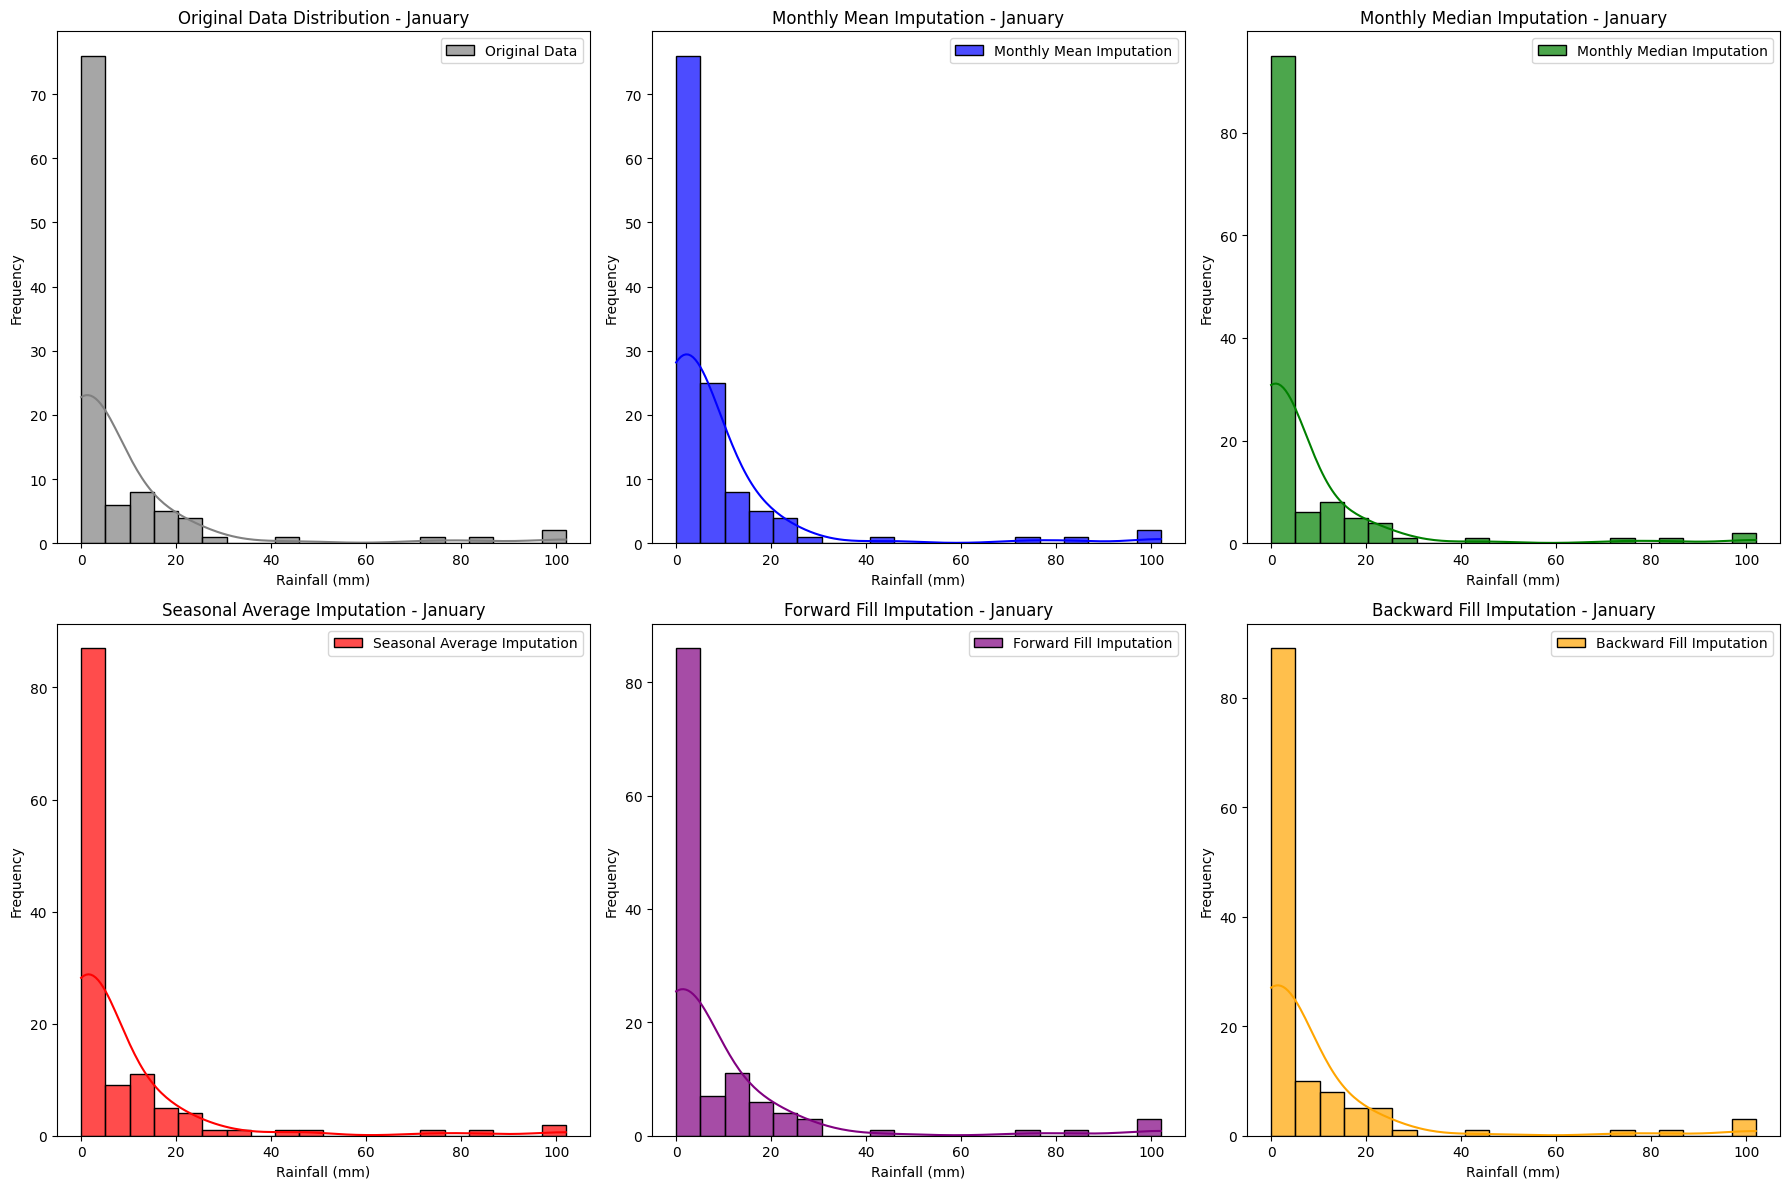

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Step 1: Identify missing values and their locations
missing_data = df.isnull().sum()
missing_locations = df[df.isnull().any(axis=1)]  # Rows with any missing values

print("Missing data count per column:\n", missing_data)
print("\nRows with missing data:\n", missing_locations)

# Step 2: Define imputation methods
def impute_monthly_mean(df):
    monthly_mean = df.mean()
    return df.apply(lambda col: col.fillna(monthly_mean[col.name]), axis=0)

def impute_monthly_median(df):
    monthly_median = df.median()
    return df.apply(lambda col: col.fillna(monthly_median[col.name]), axis=0)

def impute_seasonal_average(df, months=2):
    seasonal_avg = df.copy()
    for col in df.columns[1:]:  # Skip the 'Year' column
        for idx in df.index:
            if pd.isnull(df.at[idx, col]):  # If the value is missing
                start_idx = max(0, idx - months)  # Calculate the range for seasonal average
                end_idx = min(len(df), idx + months + 1)
                seasonal_avg.at[idx, col] = df.iloc[start_idx:end_idx][col].mean()  # Take mean from surrounding months
    return seasonal_avg

# Step 3: Impute missing values using different strategies
df_monthly_mean = impute_monthly_mean(df)
df_monthly_median = impute_monthly_median(df)
df_seasonal_avg = impute_seasonal_average(df)

# Step 4: Plotting the distributions of missing and imputed data
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Before Imputation - January
sns.histplot(df['Jan'], bins=20, color='gray', kde=True, ax=ax[0, 0], label='Original Data', alpha=0.7)
ax[0, 0].set_title('Original Data Distribution - January')
ax[0, 0].set_xlabel('Rainfall (mm)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].legend()

# After Imputation (Monthly Mean) - January
sns.histplot(df_monthly_mean['Jan'], bins=20, color='blue', kde=True, ax=ax[0, 1], label='Monthly Mean Imputation', alpha=0.7)
ax[0, 1].set_title('Monthly Mean Imputation - January')
ax[0, 1].set_xlabel('Rainfall (mm)')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].legend()

# After Imputation (Monthly Median) - January
sns.histplot(df_monthly_median['Jan'], bins=20, color='green', kde=True, ax=ax[0, 2], label='Monthly Median Imputation', alpha=0.7)
ax[0, 2].set_title('Monthly Median Imputation - January')
ax[0, 2].set_xlabel('Rainfall (mm)')
ax[0, 2].set_ylabel('Frequency')
ax[0, 2].legend()

# After Imputation (Seasonal Average) - January
sns.histplot(df_seasonal_avg['Jan'], bins=20, color='red', kde=True, ax=ax[1, 0], label='Seasonal Average Imputation', alpha=0.7)
ax[1, 0].set_title('Seasonal Average Imputation - January')
ax[1, 0].set_xlabel('Rainfall (mm)')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].legend()

# After Imputation (Forward Fill) - January
df_ffill = df.fillna(method='ffill')
sns.histplot(df_ffill['Jan'], bins=20, color='purple', kde=True, ax=ax[1, 1], label='Forward Fill Imputation', alpha=0.7)
ax[1, 1].set_title('Forward Fill Imputation - January')
ax[1, 1].set_xlabel('Rainfall (mm)')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

# After Imputation (Backward Fill) - January
df_bfill = df.fillna(method='bfill')
sns.histplot(df_bfill['Jan'], bins=20, color='orange', kde=True, ax=ax[1, 2], label='Backward Fill Imputation', alpha=0.7)
ax[1, 2].set_title('Backward Fill Imputation - January')
ax[1, 2].set_xlabel('Rainfall (mm)')
ax[1, 2].set_ylabel('Frequency')
ax[1, 2].legend()

plt.tight_layout()
plt.show()


In [109]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# Checking for missing values
missing_values = df.isnull().sum()

# Imputation Methods
df_mean_imputed = df.fillna(df.mean())
df_median_imputed = df.fillna(df.median())
df_seasonal_avg_imputed = df.copy()

# Implementing Seasonal Average imputation
for col in df.columns[1:-1]:  # Skip Year and Total columns
    for i in range(1, len(df)):
        if pd.isnull(df_seasonal_avg_imputed.at[i, col]):
            # Average of the ±2 months (handling edge cases)
            prev_month = df_seasonal_avg_imputed[col].iloc[max(i-2, 0):i].mean()
            next_month = df_seasonal_avg_imputed[col].iloc[i+1:min(i+3, len(df))].mean()
            seasonal_avg = np.mean([prev_month, next_month])
            df_seasonal_avg_imputed.at[i, col] = seasonal_avg

# Forward Fill imputation
df_forward_fill_imputed = df.fillna(method='ffill')

# Backward Fill imputation
df_backward_fill_imputed = df.fillna(method='bfill')

# Function to calculate mean, median, and variance
def calculate_stats(df):
    stats = {
        'Mean': df.mean(),
        'Median': df.median(),
        'Variance': df.var()
    }
    return pd.DataFrame(stats)

# Calculate stats for original and imputed data
original_stats = calculate_stats(df)
mean_imputed_stats = calculate_stats(df_mean_imputed)
median_imputed_stats = calculate_stats(df_median_imputed)
seasonal_avg_imputed_stats = calculate_stats(df_seasonal_avg_imputed)
forward_fill_imputed_stats = calculate_stats(df_forward_fill_imputed)
backward_fill_imputed_stats = calculate_stats(df_backward_fill_imputed)

# Combine all the statistics into one DataFrame
stats_comparison = pd.concat([
    original_stats['Mean'],
    original_stats['Median'],
    original_stats['Variance'],
    mean_imputed_stats['Mean'],
    mean_imputed_stats['Median'],
    mean_imputed_stats['Variance'],
    median_imputed_stats['Mean'],
    median_imputed_stats['Median'],
    median_imputed_stats['Variance'],
    seasonal_avg_imputed_stats['Mean'],
    seasonal_avg_imputed_stats['Median'],
    seasonal_avg_imputed_stats['Variance'],
    forward_fill_imputed_stats['Mean'],
    forward_fill_imputed_stats['Median'],
    forward_fill_imputed_stats['Variance'],
    backward_fill_imputed_stats['Mean'],
    backward_fill_imputed_stats['Median'],
    backward_fill_imputed_stats['Variance']
], axis=1)

# Rename columns for clarity
stats_comparison.columns = [
    'Original Mean', 'Original Median', 'Original Variance',
    'Monthly Mean Imputation Mean', 'Monthly Mean Imputation Median', 'Monthly Mean Imputation Variance',
    'Monthly Median Imputation Mean', 'Monthly Median Imputation Median', 'Monthly Median Imputation Variance',
    'Seasonal Average Imputation Mean', 'Seasonal Average Imputation Median', 'Seasonal Average Imputation Variance',
    'Forward Fill Imputation Mean', 'Forward Fill Imputation Median', 'Forward Fill Imputation Variance',
    'Backward Fill Imputation Mean', 'Backward Fill Imputation Median', 'Backward Fill Imputation Variance'
]

# Display the result
print(stats_comparison)


      Original Mean  Original Median  Original Variance  \
Year    1962.500000          1962.50        1291.666667   
Jan        7.563810             0.20         337.482139   
Feb        8.246875             0.00         308.435359   
Mar       15.376699             1.50         689.304942   
Apr       97.380612            41.65       45800.439311   
May      215.868367           115.40      102916.198886   
June     176.191089            84.20      118477.259820   
July     211.617347           111.25       92992.110933   
Aug      235.678218           132.30      180049.569521   
Sept     333.835714           183.75      359879.624794   
Oct      325.777419           184.60      236166.425898   
Nov       62.243902            37.30        4124.738876   
Dec       16.936885             7.25         541.749785   

      Monthly Mean Imputation Mean  Monthly Mean Imputation Median  \
Year                   1962.500000                         1962.50   
Jan                       7.56381

C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\744976897.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_forward_fill_imputed = df.fillna(method='ffill')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_8472\744976897.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_backward_fill_imputed = df.fillna(method='bfill')


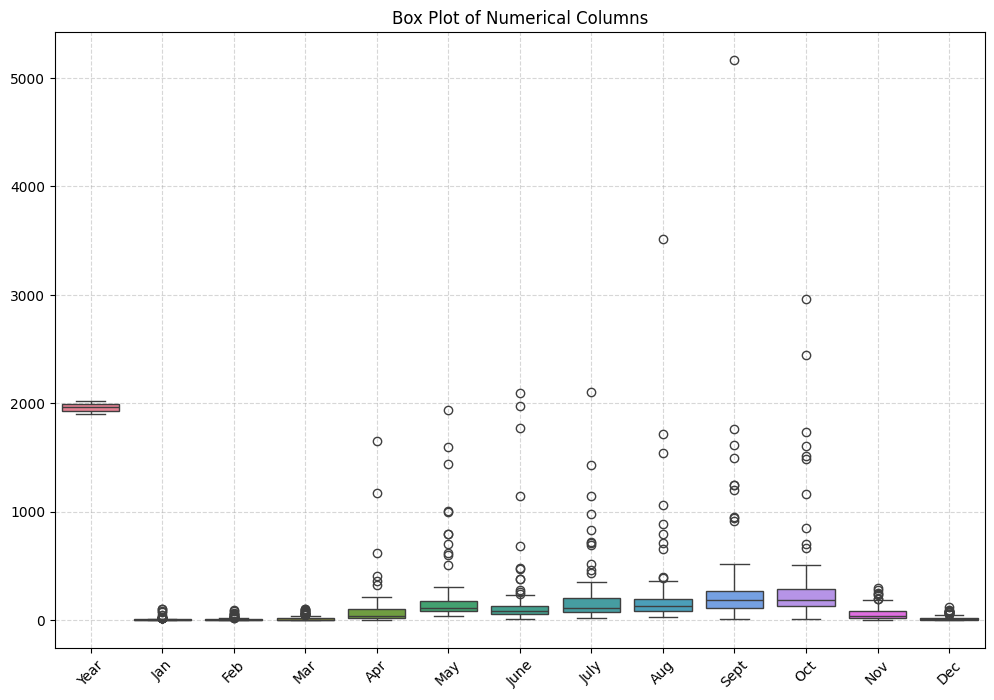

Outliers based on IQR method (True indicates outlier):
      Year    Jan    Feb    Mar    Apr    May   June   July    Aug   Sept  \
0    False  False   True  False  False  False   True  False  False  False   
1    False  False  False   True  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False   True  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
119  False  False  False  False  False  False   True  False  False  False   
120  False   True  False  False  False  False  False  False  False   True   
121  False  False  False  False   True  False   True  False  False   True   
122  False  False  False  False  False  False  False   True  False   True   
123  False  False  False  False  False  False  False  False  False  False   

       Oct    Nov   

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load your dataset
df = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')

# --- Function to detect outliers using Z-score ---
def detect_outliers_zscore(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    z_scores = np.abs(zscore(numeric_cols))
    return (z_scores > 3).any(axis=1)  # Any Z-score > 3 in any column

# --- Function to detect outliers using IQR ---
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    return ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# --- Function to plot boxplots for numeric columns ---
def plot_boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=numeric_cols)
    plt.title("Box Plot of Numerical Columns")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# --- Function to cap outliers ---
def cap_outliers(df):
    df_capped = df.copy()
    numeric_cols = df_capped.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        upper_limit = df_capped[col].quantile(0.95)
        lower_limit = df_capped[col].quantile(0.05)
        df_capped[col] = np.where(df_capped[col] > upper_limit, upper_limit,
                                   np.where(df_capped[col] < lower_limit, lower_limit, df_capped[col]))
    return df_capped

# --- Function to remove outliers using IQR method ---
def remove_outliers(df):
    df_no_outliers = df.copy()
    numeric_cols = df_no_outliers.select_dtypes(include=[np.number])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
    return df_no_outliers[mask]

# --- Detect outliers using Z-score ---
outliers_zscore = detect_outliers_zscore(df)
df_zscore_outliers_removed = df[~outliers_zscore]

# --- Detect outliers using IQR ---
outliers_iqr = detect_outliers_iqr(df)

# --- Plot boxplots ---
plot_boxplots(df)

# --- Display outliers detected by IQR ---
print("Outliers based on IQR method (True indicates outlier):")
print(outliers_iqr)

# --- Display data after removing Z-score outliers ---
print("\nData after removing outliers based on Z-Score:")
print(df_zscore_outliers_removed.head())

# --- Cap outliers ---
df_capped = cap_outliers(df)
print("\nData after capping outliers:")
print(df_capped.head())

# --- Remove outliers using IQR ---
df_no_outliers = remove_outliers(df)
print("\nData after removing outliers using IQR method:")
print(df_no_outliers.head())

# --- Optional: Summary statistics after each method ---
print("\nOriginal Data Summary:")
print(df.describe())

print("\nCapped Data Summary:")
print(df_capped.describe())

print("\nIQR-Removed Data Summary:")
print(df_no_outliers.describe())

print("\nZ-Score Removed Data Summary:")
print(df_zscore_outliers_removed.describe())


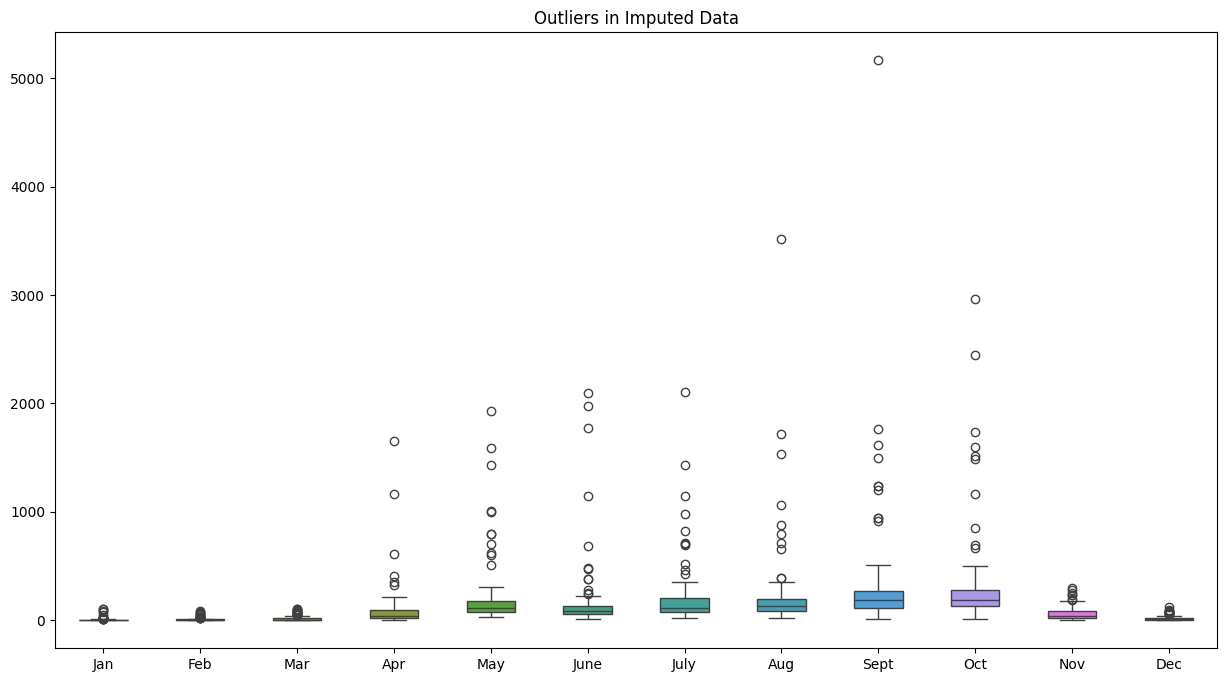

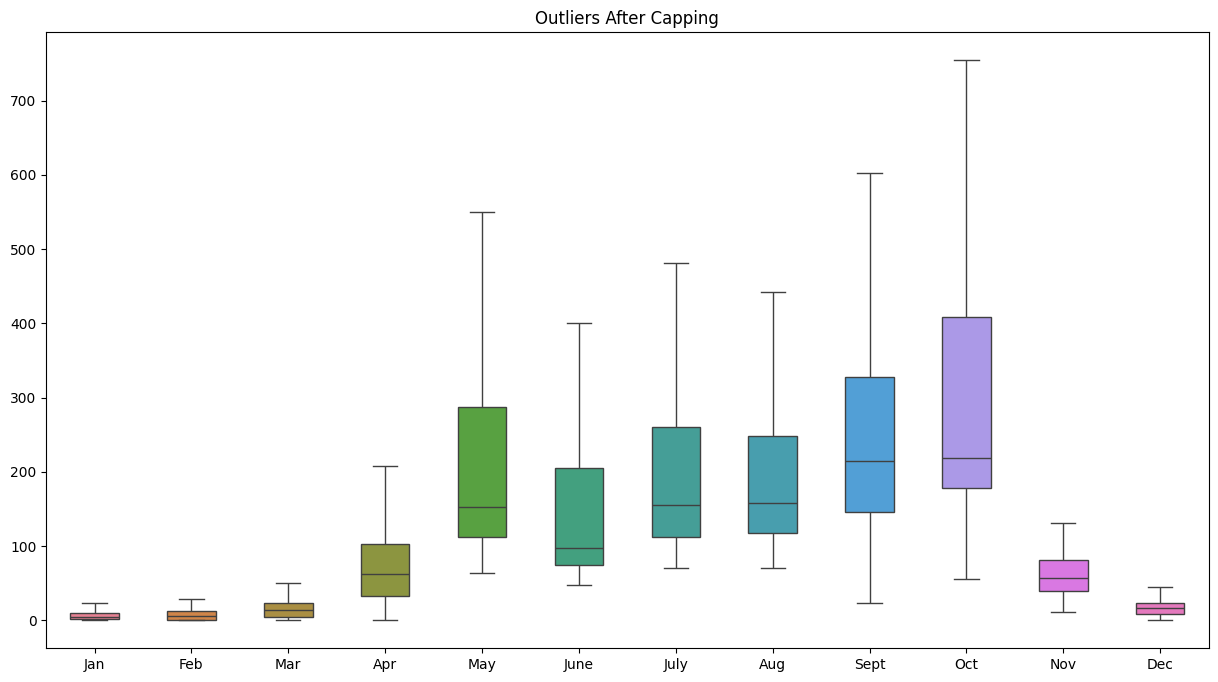

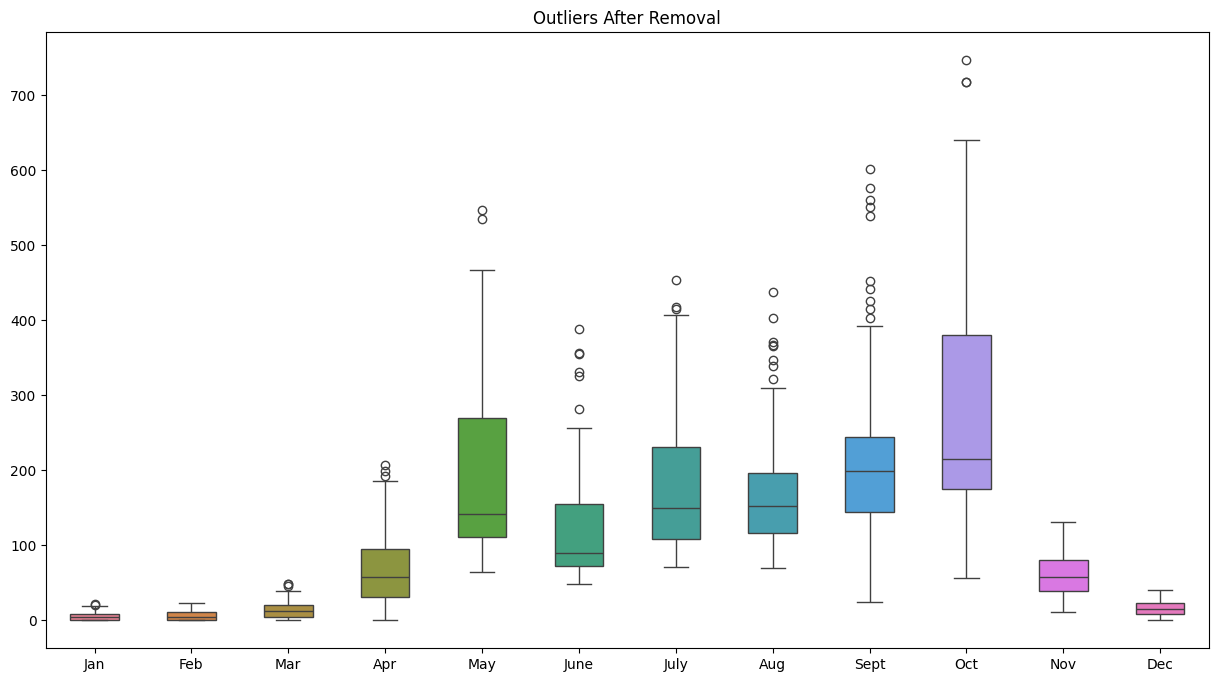

Original Data outliers count:
 Jan     10
Feb      6
Mar      4
Apr     10
May      6
June    15
July     8
Aug     11
Sept    17
Oct      6
Nov      0
Dec      3
dtype: int64
Capped Data outliers count:
 Jan     0
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     0
dtype: int64
Removed Data outliers count:
 Jan     11
Feb      7
Mar      6
Apr     11
May      7
June    15
July     9
Aug     14
Sept    18
Oct      9
Nov      1
Dec      4
dtype: int64


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate the seasonal mean for a given month ± 2 months
def seasonal_mean_imputation(df):
    seasonal_df = df.copy()

    for month in df.columns:
        # Calculate seasonal mean for each month
        seasonal_values = df[month].copy()

        for i in range(2, len(df)-2):
            seasonal_values.iloc[i] = np.nanmean(df.iloc[i-2:i+3][month])  # Mean of ±2 months

        seasonal_df[month] = seasonal_values
    return seasonal_df

# Load your data (replace with actual file path)
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-modified.csv", index_col="Year")

# Replace NaN values with the seasonal mean
df_imputed = seasonal_mean_imputation(df)

# Now let's detect and visualize the outliers
def detect_outliers(df):
    outliers = pd.DataFrame(index=df.index)
    for column in df.columns:
        # Define IQR for outlier detection
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))

    return outliers

# Function to visualize the data and outliers
def visualize_outliers(df, outliers, title="Outliers Visualization"):
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.boxplot(data=df, ax=ax, width=0.5)
    ax.set_title(title)
    plt.show()

# Detect outliers in the imputed data
outliers_imputed = detect_outliers(df_imputed)

# Visualize the outliers in the original and imputed data
visualize_outliers(df, outliers_imputed, title="Outliers in Imputed Data")

# Outlier treatment strategy: Let's choose capping for the outliers
def cap_outliers(df):
    df_capped = df.copy()
    for column in df.columns:
        # Define IQR for outlier capping
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers to the bounds
        df_capped[column] = np.clip(df[column], lower_bound, upper_bound)

    return df_capped

# Apply outlier capping
df_capped = cap_outliers(df_imputed)

# Detect outliers in the capped data
outliers_capped = detect_outliers(df_capped)

# Visualize the outliers after capping
visualize_outliers(df_capped, outliers_capped, title="Outliers After Capping")

# Optional: Remove outliers (if needed) by setting them to NaN or other values
def remove_outliers(df):
    df_removed = df.copy()
    for column in df.columns:
        # Define IQR for outlier removal
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers by setting them to NaN
        df_removed[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), np.nan)

    return df_removed

# Optional: Apply removal of outliers
df_removed = remove_outliers(df_imputed)

# Visualize the data after removing outliers
visualize_outliers(df_removed, outliers_imputed, title="Outliers After Removal")

# Compare the results:
print("Original Data outliers count:\n", outliers_imputed.sum())
print("Capped Data outliers count:\n", outliers_capped.sum())
print("Removed Data outliers count:\n", df_removed.isnull().sum())

# You can choose any of the above treatments for your outliers based on your data requirements


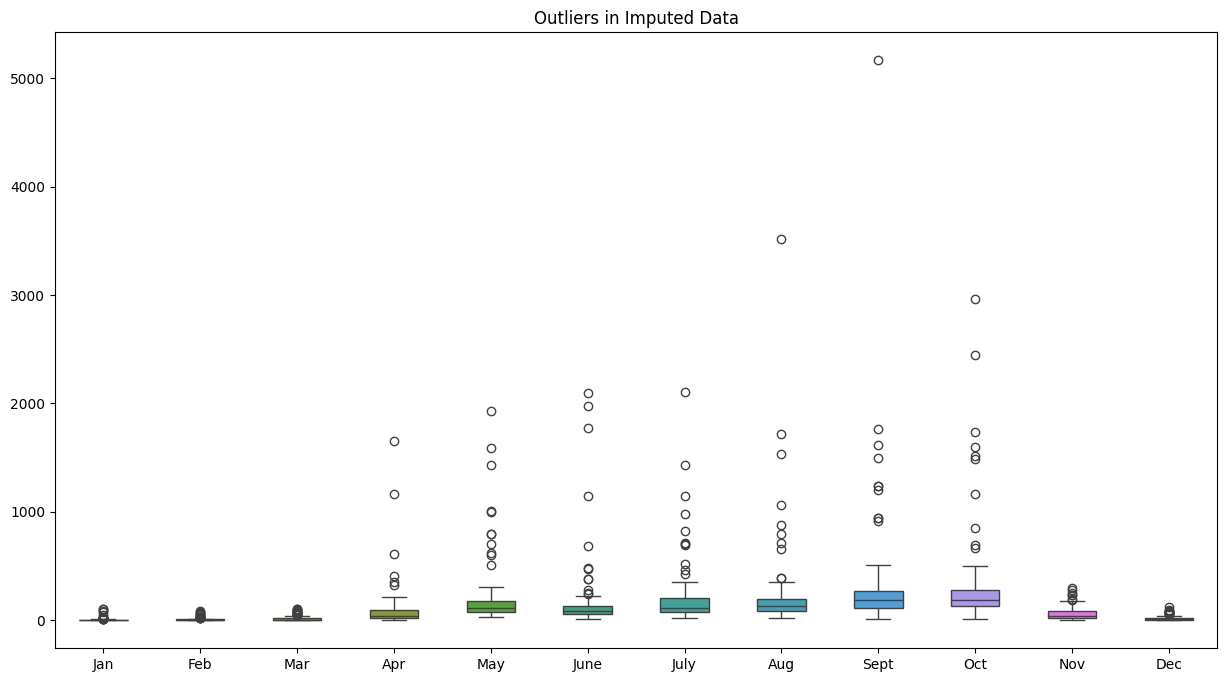

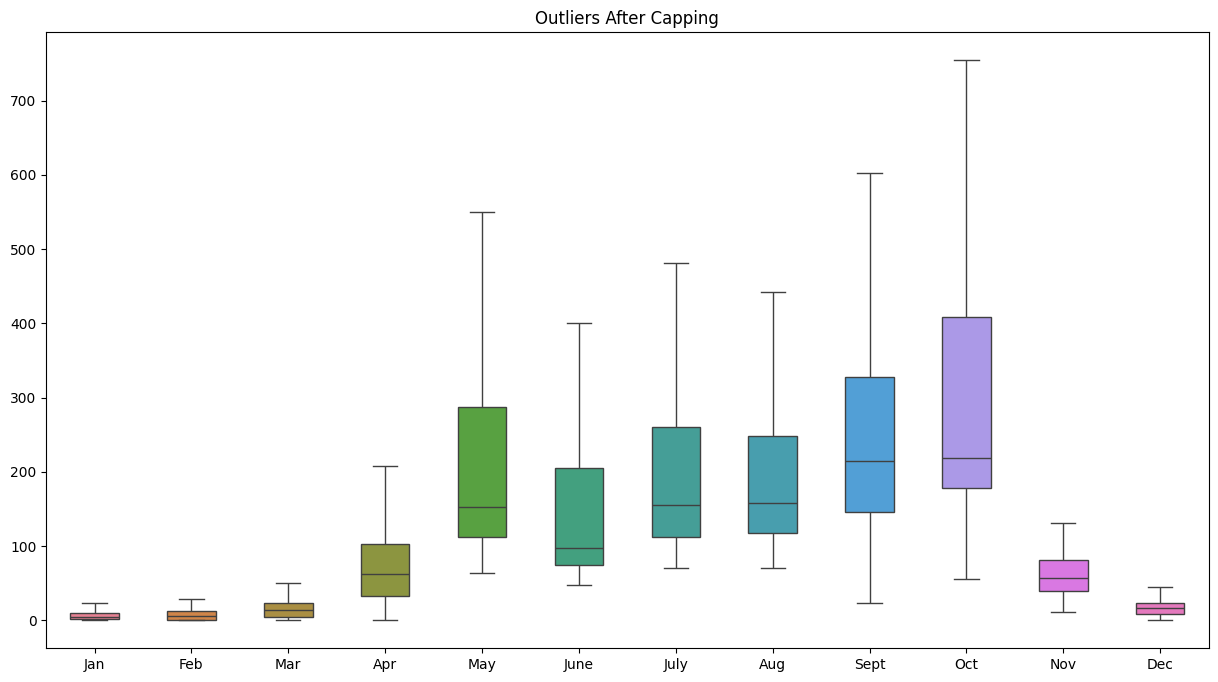

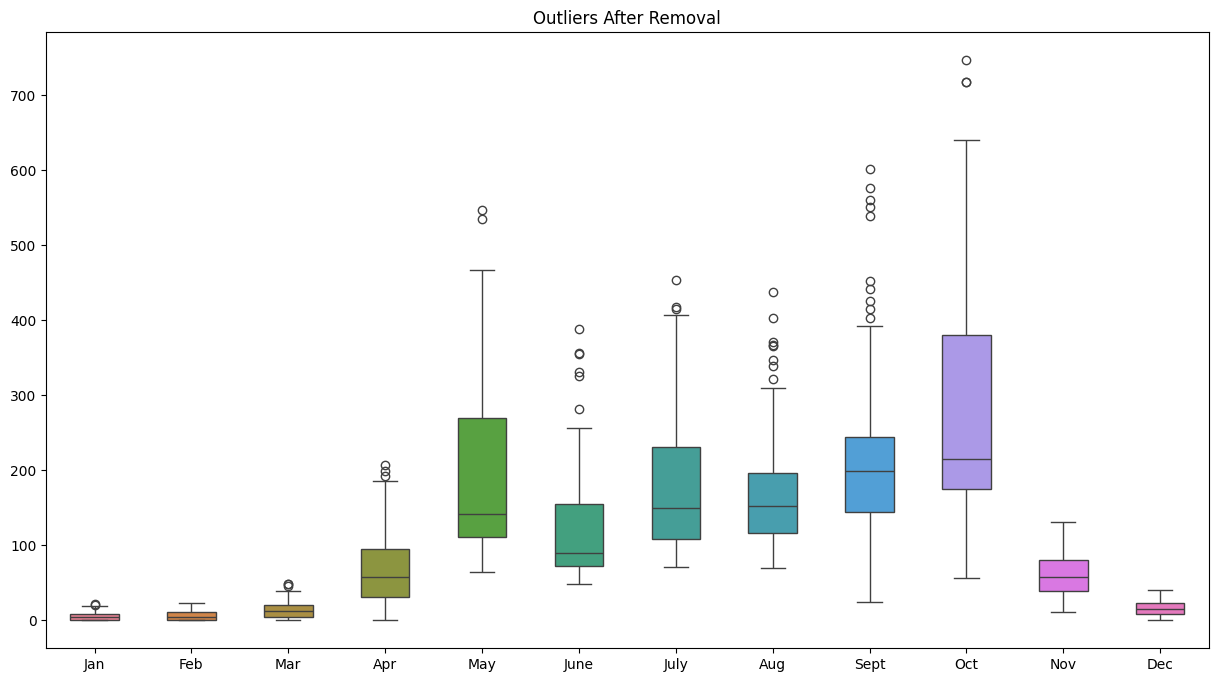

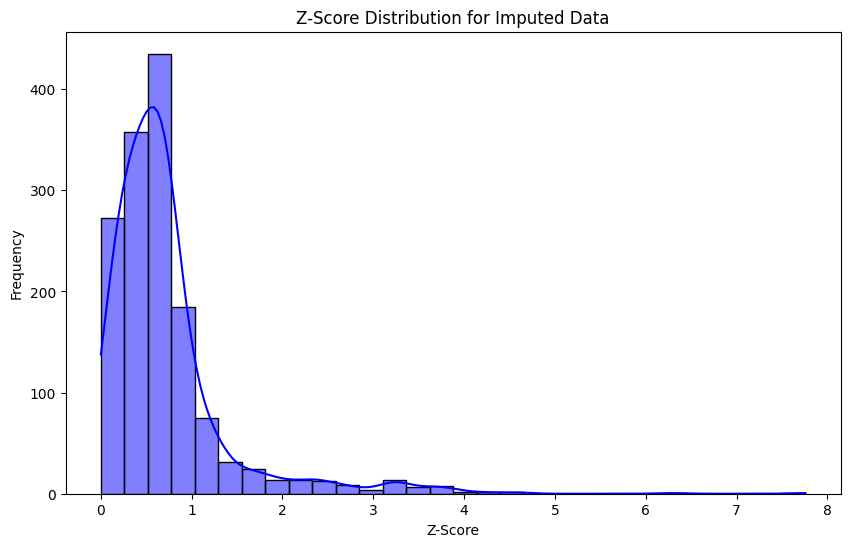

Original Data outliers count (IQR):
 Jan     10
Feb      6
Mar      4
Apr     10
May      6
June    15
July     8
Aug     11
Sept    17
Oct      6
Nov      0
Dec      3
dtype: int64
Capped Data outliers count (IQR):
 Jan     0
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     0
dtype: int64
Removed Data outliers count (IQR):
 Jan     11
Feb      7
Mar      6
Apr     11
May      7
June    15
July     9
Aug     14
Sept    18
Oct      9
Nov      1
Dec      4
dtype: int64
Z-Score Outliers count (threshold=3):
 Jan     2
Feb     4
Mar     2
Apr     5
May     2
June    4
July    4
Aug     5
Sept    6
Oct     3
Nov     0
Dec     2
dtype: int64


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Function to calculate the seasonal mean for a given month ± 2 months
def seasonal_mean_imputation(df):
    seasonal_df = df.copy()

    for month in df.columns:
        # Calculate seasonal mean for each month
        seasonal_values = df[month].copy()

        for i in range(2, len(df)-2):
            seasonal_values.iloc[i] = np.nanmean(df.iloc[i-2:i+3][month])  # Mean of ±2 months

        seasonal_df[month] = seasonal_values
    return seasonal_df

# Load your data (replace with actual file path)
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-modified.csv", index_col="Year")

# Replace NaN values with the seasonal mean
df_imputed = seasonal_mean_imputation(df)

# Now let's detect and visualize the outliers
def detect_outliers(df):
    outliers = pd.DataFrame(index=df.index)
    for column in df.columns:
        # Define IQR for outlier detection
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))

    return outliers

# Function to visualize the data and outliers
def visualize_outliers(df, outliers, title="Outliers Visualization"):
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.boxplot(data=df, ax=ax, width=0.5)
    ax.set_title(title)
    plt.show()

# Detect outliers in the imputed data
outliers_imputed = detect_outliers(df_imputed)

# Visualize the outliers in the original and imputed data
visualize_outliers(df, outliers_imputed, title="Outliers in Imputed Data")

# Outlier treatment strategy: Let's choose capping for the outliers
def cap_outliers(df):
    df_capped = df.copy()
    for column in df.columns:
        # Define IQR for outlier capping
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers to the bounds
        df_capped[column] = np.clip(df[column], lower_bound, upper_bound)

    return df_capped

# Apply outlier capping
df_capped = cap_outliers(df_imputed)

# Detect outliers in the capped data
outliers_capped = detect_outliers(df_capped)

# Visualize the outliers after capping
visualize_outliers(df_capped, outliers_capped, title="Outliers After Capping")

# Optional: Remove outliers (if needed) by setting them to NaN or other values
def remove_outliers(df):
    df_removed = df.copy()
    for column in df.columns:
        # Define IQR for outlier removal
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers by setting them to NaN
        df_removed[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), np.nan)

    return df_removed

# Optional: Apply removal of outliers
df_removed = remove_outliers(df_imputed)

# Visualize the data after removing outliers
visualize_outliers(df_removed, outliers_imputed, title="Outliers After Removal")

# **Z-Score Method for Outlier Detection**
def z_score_outliers(df, threshold=3):
    z_scores = np.abs(zscore(df, nan_policy='omit'))  # Calculate Z-scores for each column
    outliers_z = pd.DataFrame(z_scores > threshold, columns=df.columns, index=df.index)  # Identify outliers
    return outliers_z, z_scores

# Detect outliers using Z-score
outliers_z, z_scores = z_score_outliers(df_imputed)

# Visualize Z-score outliers
def plot_z_score_distribution(z_scores, title="Z-Score Distribution"):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(z_scores.flatten(), kde=True, ax=ax, color='blue', bins=30)
    ax.set_title(title)
    ax.set_xlabel('Z-Score')
    ax.set_ylabel('Frequency')
    plt.show()

# Plot Z-score distribution for the imputed data
plot_z_score_distribution(z_scores, title="Z-Score Distribution for Imputed Data")

# Compare the results:
print("Original Data outliers count (IQR):\n", outliers_imputed.sum())
print("Capped Data outliers count (IQR):\n", outliers_capped.sum())
print("Removed Data outliers count (IQR):\n", df_removed.isnull().sum())
print("Z-Score Outliers count (threshold=3):\n", outliers_z.sum())

# You can choose any of the above treatments for your outliers based on your data requirements


Original Data Statistics:
{'mean': Jan       7.580921
Feb       8.403442
Mar      15.971571
Apr      91.673794
May     217.022046
June    172.691210
July    216.626762
Aug     222.291625
Sept    313.325068
Oct     334.903430
Nov      61.490894
Dec      16.756341
dtype: float64, 'std': Jan       9.531421
Feb      11.257367
Mar      15.024263
Apr      98.416869
May     143.956654
June    156.354160
July    153.648643
Aug     176.038067
Sept    277.325484
Oct     340.429599
Nov      29.272864
Dec       9.977423
dtype: float64, 'min': Jan      0.000
Feb      0.000
Mar      0.000
Apr      0.000
May     64.350
June    47.925
July    71.040
Aug     70.100
Sept    23.900
Oct     55.850
Nov     11.100
Dec      0.700
dtype: float64, '25%': Jan       1.40000
Feb       1.00000
Mar       4.74625
Apr      32.12500
May     111.98000
June     74.52750
July    111.86250
Aug     118.12500
Sept    145.40000
Oct     178.82500
Nov      39.45000
Dec       8.19000
Name: 0.25, dtype: float64, '50%': Jan      

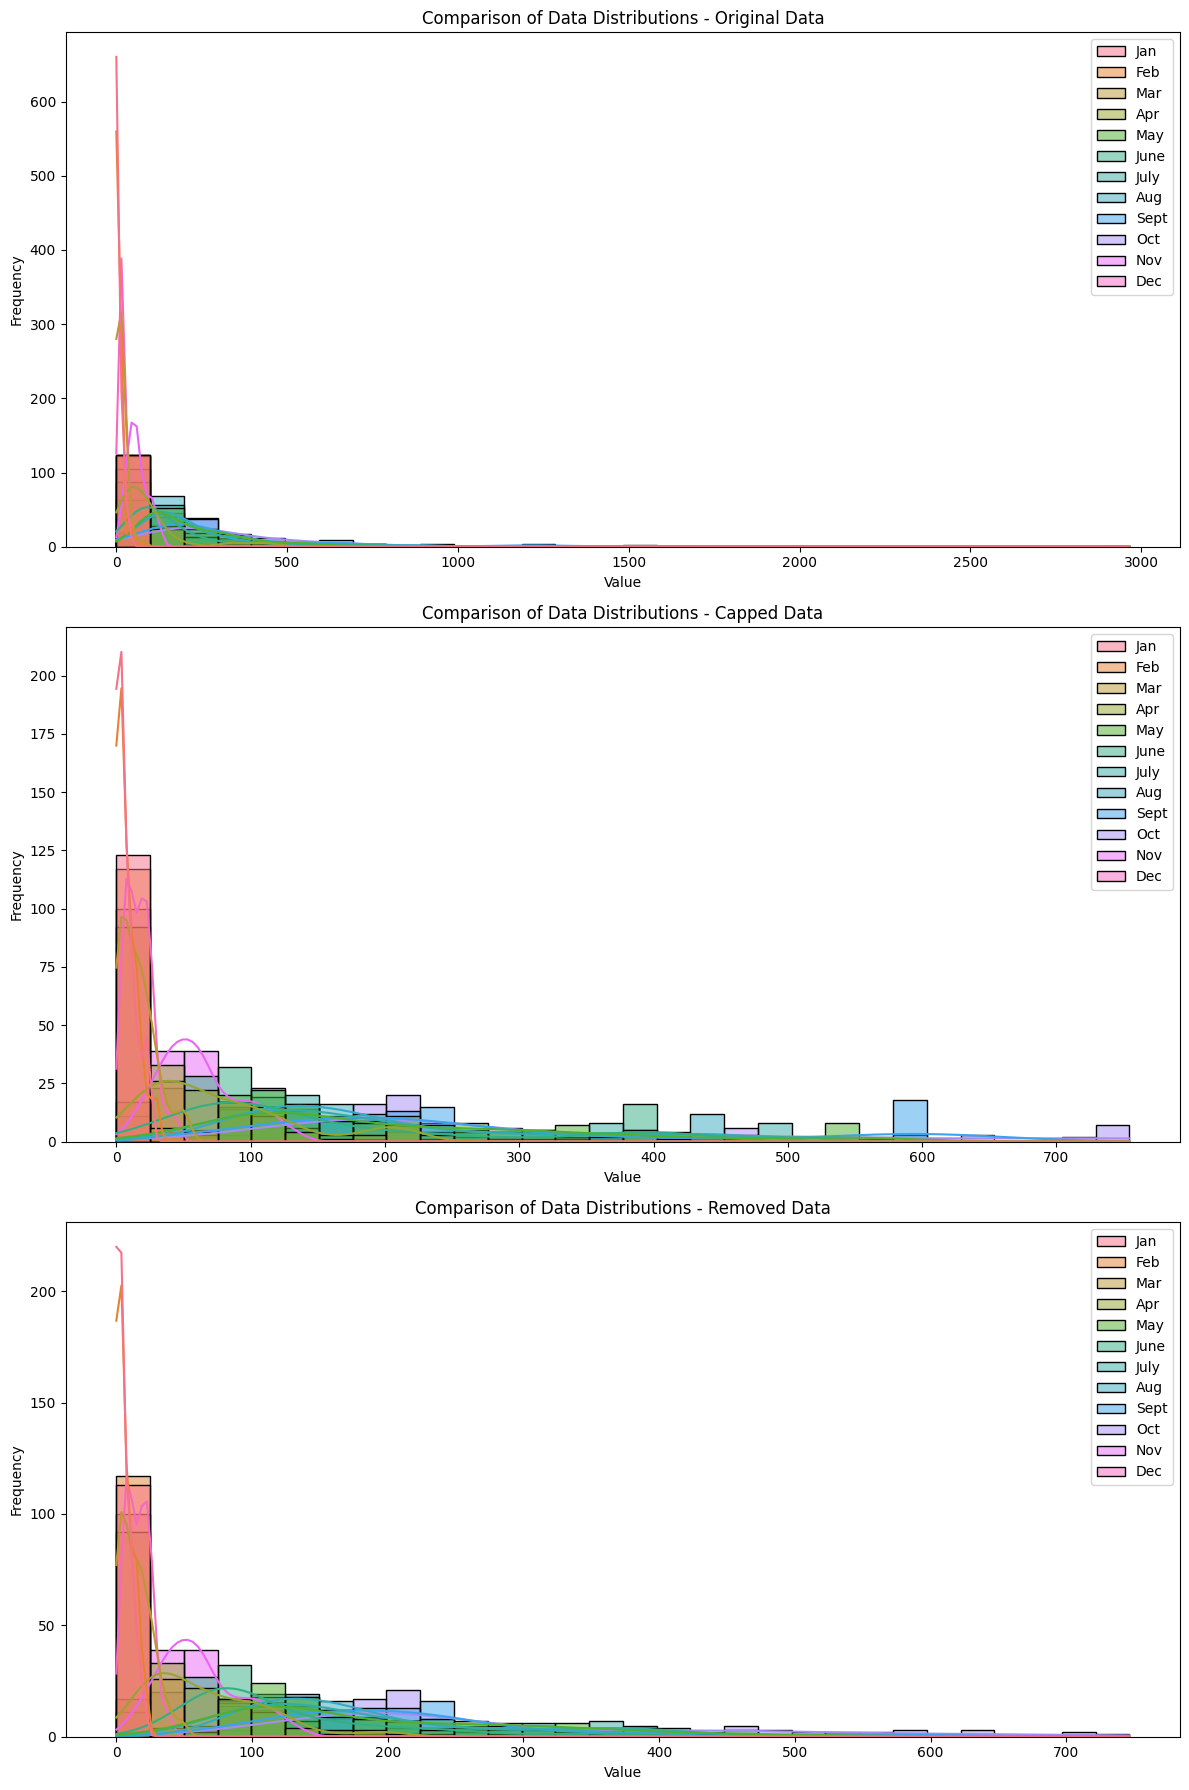

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (replace with actual file path)
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-modified.csv", index_col="Year")

# Function to calculate the seasonal mean for a given month ± 2 months
def seasonal_mean_imputation(df):
    seasonal_df = df.copy()

    for month in df.columns:
        # Calculate seasonal mean for each month
        seasonal_values = df[month].copy()

        for i in range(2, len(df)-2):
            seasonal_values.iloc[i] = np.nanmean(df.iloc[i-2:i+3][month])  # Mean of ±2 months

        seasonal_df[month] = seasonal_values
    return seasonal_df

# Replace NaN values with the seasonal mean
df_imputed = seasonal_mean_imputation(df)

# Outlier detection using IQR method
def detect_outliers(df):
    outliers = pd.DataFrame(index=df.index)
    for column in df.columns:
        # Define IQR for outlier detection
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))

    return outliers

# Function to cap outliers
def cap_outliers(df):
    df_capped = df.copy()
    for column in df.columns:
        # Define IQR for outlier capping
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers to the bounds
        df_capped[column] = np.clip(df[column], lower_bound, upper_bound)

    return df_capped

# Function to remove outliers
def remove_outliers(df):
    df_removed = df.copy()
    for column in df.columns:
        # Define IQR for outlier removal
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers by setting them to NaN
        df_removed[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), np.nan)

    return df_removed

# Apply capping and removal methods
df_capped = cap_outliers(df_imputed)
df_removed = remove_outliers(df_imputed)

# Function to calculate basic statistics for comparison
def get_statistics(df):
    return {
        'mean': df.mean(),
        'std': df.std(),
        'min': df.min(),
        '25%': df.quantile(0.25),
        '50%': df.median(),
        '75%': df.quantile(0.75),
        'max': df.max()
    }

# Get statistics for original, capped, and removed datasets
original_stats = get_statistics(df_imputed)
capped_stats = get_statistics(df_capped)
removed_stats = get_statistics(df_removed)

# Print statistical comparison
print("Original Data Statistics:")
print(original_stats)
print("\nCapped Data Statistics:")
print(capped_stats)
print("\nRemoved Data Statistics:")
print(removed_stats)

# Visualization to compare distributions
def compare_distributions(original, capped, removed, title="Distribution Comparison"):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

    # Plot original data
    sns.histplot(original, kde=True, ax=axes[0], color='blue', bins=30)
    axes[0].set_title(f"{title} - Original Data")
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')

    # Plot capped data
    sns.histplot(capped, kde=True, ax=axes[1], color='orange', bins=30)
    axes[1].set_title(f"{title} - Capped Data")
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Frequency')

    # Plot removed data
    sns.histplot(removed, kde=True, ax=axes[2], color='green', bins=30)
    axes[2].set_title(f"{title} - Removed Data")
    axes[2].set_xlabel('Value')
    axes[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Compare distributions of the original, capped, and removed data
compare_distributions(df_imputed, df_capped, df_removed, title="Comparison of Data Distributions")



<ipython-input-71-5c2bd3772ded>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(monthly_means[col], inplace=True)


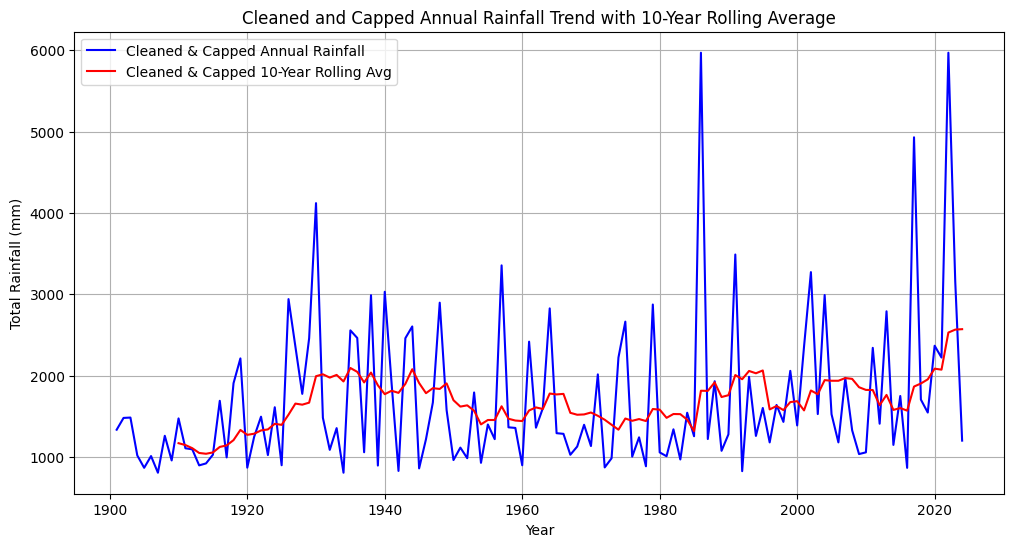

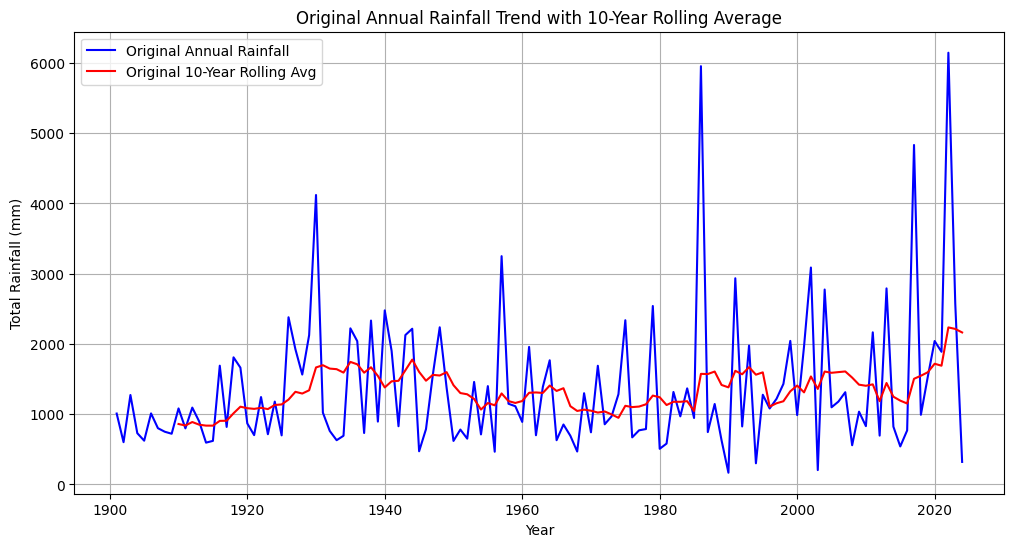

Original Dataset Mean: 1362.4266129032258
Cleaned (Capped) Dataset Mean: 1700.6933922857693
Original Dataset Variance: 979607.8019689218
Cleaned (Capped) Dataset Variance: 890283.9187490204


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset (replace with your actual file path)
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-modified.csv", index_col="Year")

# Data Cleaning: Replace NaN values with seasonal (monthly) mean
df_cleaned = df.copy()

# Calculate seasonal (monthly) means for each column (Jan, Feb, Mar, ..., Dec)
monthly_means = df_cleaned.iloc[:, 1:].mean(axis=0)

# Replace NaN values with monthly means
for col in df_cleaned.columns[1:]:
    df_cleaned[col].fillna(monthly_means[col], inplace=True)

# After cleaning, calculate total yearly rainfall
df_cleaned['Total_Yearly_Rainfall'] = df_cleaned.sum(axis=1)

# --- Outlier Detection and Treatment ---
# Calculate Z-scores for detecting outliers (threshold of 3)
z_scores = stats.zscore(df_cleaned['Total_Yearly_Rainfall'])

# Outlier detection: define outliers as having a Z-score > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)

# Treatment Strategy: Capping outliers (using the 1st and 99th percentiles)
lower_limit = df_cleaned['Total_Yearly_Rainfall'].quantile(0.01)
upper_limit = df_cleaned['Total_Yearly_Rainfall'].quantile(0.99)

# Apply capping
df_cleaned['Total_Yearly_Rainfall_Capped'] = df_cleaned['Total_Yearly_Rainfall'].clip(lower=lower_limit, upper=upper_limit)

# Alternatively, if you prefer outlier removal, use:
# df_cleaned_no_outliers = df_cleaned[~outliers]

# Calculate the 10-Year Rolling Average for the cleaned (capped) data
df_cleaned['10-Year Rolling Avg'] = df_cleaned['Total_Yearly_Rainfall_Capped'].rolling(window=10).mean()

# Plot the cleaned dataset with 10-Year Rolling Average (after outlier treatment)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['Total_Yearly_Rainfall_Capped'], label="Cleaned & Capped Annual Rainfall", color='blue')
sns.lineplot(x=df_cleaned.index, y=df_cleaned['10-Year Rolling Avg'], label="Cleaned & Capped 10-Year Rolling Avg", color='red')

# Customize the plot
plt.title("Cleaned and Capped Annual Rainfall Trend with 10-Year Rolling Average")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# --- Plot Original Data with Rolling Average ---
# Calculate total yearly rainfall for the original dataset (before cleaning)
df['Total_Yearly_Rainfall'] = df.sum(axis=1)

# Calculate the 10-Year Rolling Average for the original data
df['10-Year Rolling Avg'] = df['Total_Yearly_Rainfall'].rolling(window=10).mean()

# Plot the original dataset with 10-Year Rolling Average
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Total_Yearly_Rainfall'], label="Original Annual Rainfall", color='blue')
sns.lineplot(x=df.index, y=df['10-Year Rolling Avg'], label="Original 10-Year Rolling Avg", color='red')

# Customize the plot
plt.title("Original Annual Rainfall Trend with 10-Year Rolling Average")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# --- Key Differences After Cleaning ---
# We can calculate some summary statistics for comparison
original_mean = df['Total_Yearly_Rainfall'].mean()
cleaned_mean = df_cleaned['Total_Yearly_Rainfall_Capped'].mean()

original_variance = df['Total_Yearly_Rainfall'].var()
cleaned_variance = df_cleaned['Total_Yearly_Rainfall_Capped'].var()

print(f"Original Dataset Mean: {original_mean}")
print(f"Cleaned (Capped) Dataset Mean: {cleaned_mean}")
print(f"Original Dataset Variance: {original_variance}")
print(f"Cleaned (Capped) Dataset Variance: {cleaned_variance}")

# Optionally, for removal strategy (outliers removed) instead of capping:
# Calculate 10-Year Rolling Average for outlier removed data
# df_cleaned_no_outliers['Total_Yearly_Rainfall'] = df_cleaned_no_outliers.sum(axis=1)
# df_cleaned_no_outliers['10-Year Rolling Avg'] = df_cleaned_no_outliers['Total_Yearly_Rainfall'].rolling(window=10).mean()


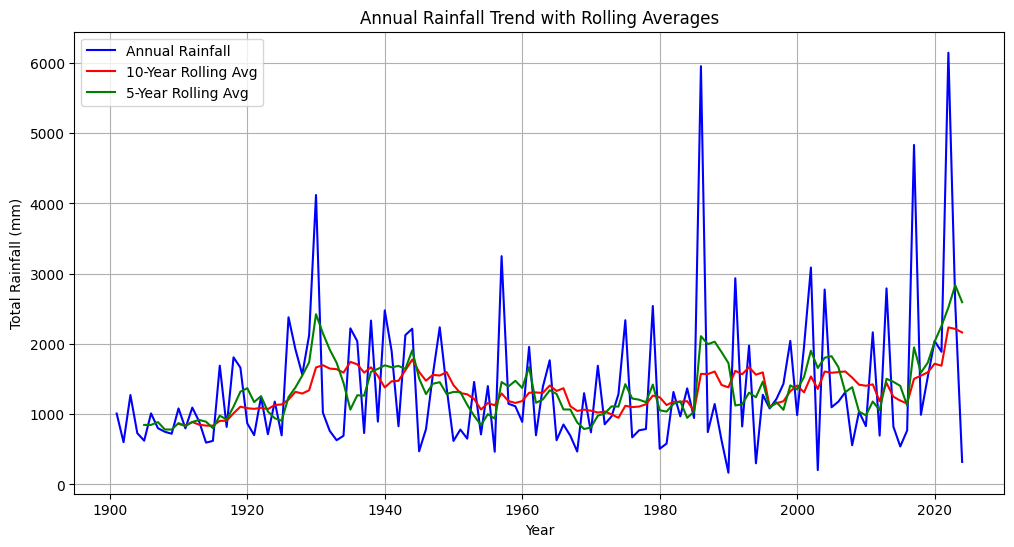

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual file path)
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-modified.csv", index_col="Year")

# Calculate total yearly rainfall (sum of all months for each year)
df['Total_Yearly_Rainfall'] = df.sum(axis=1)

# Calculate rolling averages for 10-year, 5-year, and 2-year windows
df['10-Year Rolling Avg'] = df['Total_Yearly_Rainfall'].rolling(window=10).mean()
df['5-Year Rolling Avg'] = df['Total_Yearly_Rainfall'].rolling(window=5).mean()
#df['2-Year Rolling Avg'] = df['Total_Yearly_Rainfall'].rolling(window=2).mean()

# Plot the rainfall data with rolling averages
plt.figure(figsize=(12, 6))

# Plot the total yearly rainfall
sns.lineplot(x=df.index, y=df['Total_Yearly_Rainfall'], label="Annual Rainfall", color='blue')

# Plot the rolling averages
sns.lineplot(x=df.index, y=df['10-Year Rolling Avg'], label="10-Year Rolling Avg", color='red')
sns.lineplot(x=df.index, y=df['5-Year Rolling Avg'], label="5-Year Rolling Avg", color='green')
#sns.lineplot(x=df.index, y=df['2-Year Rolling Avg'], label="2-Year Rolling Avg", color='orange')

# Customize the plot
plt.title("Annual Rainfall Trend with Rolling Averages")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.legend()
plt.grid()

# Show the plot
plt.show()



In [58]:
import pandas as pd

# Load the dataset (replace with your actual file path)
df = pd.read_csv("bangalore-rainfall-data-1900-2024-sept-modified.csv", index_col="Year")

# Calculate total yearly rainfall (sum of all months for each year)
df['Total_Yearly_Rainfall'] = df.sum(axis=1)  # Sum over columns (months)

# Calculate total monthly rainfall (sum of rainfall for each month across all years)
total_rainfall_monthly = df.sum(axis=0)  # Sum over rows (years)

# Calculate total rainfall for the entire dataset (sum of all yearly rainfall totals)
total_rainfall_yearly = df['Total_Yearly_Rainfall'].sum()  # Sum of total rainfall for each year

# Calculate average rainfall for the entire dataset
average_rainfall_yearly = df['Total_Yearly_Rainfall'].mean()  # Average of total yearly rainfall
average_rainfall_monthly = df.mean().mean()  # Average of all monthly rainfall values across all years

# Calculate variance of rainfall for both yearly and monthly rainfall
variance_rainfall_yearly = df['Total_Yearly_Rainfall'].var()  # Variance of total yearly rainfall
variance_rainfall_monthly = df.var().mean()  # Average variance across months

# Display the results
print("Total Yearly Rainfall (overall):", total_rainfall_yearly)
print("Total Monthly Rainfall (each month):")
print(total_rainfall_monthly)
print("Average Yearly Rainfall:", average_rainfall_yearly)
print("Average Monthly Rainfall:", average_rainfall_monthly)
print("Variance of Yearly Rainfall:", variance_rainfall_yearly)
print("Variance of Monthly Rainfall:", variance_rainfall_monthly)


Total Yearly Rainfall (overall): 168940.9
Total Monthly Rainfall (each month):
Jan                         794.2
Feb                         791.7
Mar                        1583.8
Apr                        9543.3
May                       21155.1
June                      17795.3
July                      20738.5
Aug                       23803.5
Sept                      32715.9
Oct                       30297.3
Nov                        7656.0
Dec                        2066.3
Total_Yearly_Rainfall    168940.9
dtype: float64
Average Yearly Rainfall: 1362.4266129032258
Average Monthly Rainfall: 236.08796548022661
Variance of Yearly Rainfall: 979607.8019689218
Variance of Monthly Rainfall: 163222.3955563356


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify Extreme Rainfall Events (Top 1% of Monthly Rainfall)
threshold_extreme = df.iloc[:, 1:].quantile(0.99)
extreme_events = df.iloc[:, 1:][df.iloc[:, 1:] > threshold_extreme]

# Identify Drought Years (Bottom 5% of Annual Rainfall)
annual_rainfall = df.iloc[:, 1:].sum(axis=1)
drought_threshold = annual_rainfall.quantile(0.05)
drought_years = df[df['Total_Yearly_Rainfall'] <= drought_threshold]

# Count extreme events per decade
df['Decade'] = (df['Year'] // 10) * 10
extreme_event_counts = df.groupby('Decade').apply(lambda x: (x.iloc[:, 1:] > threshold_extreme).sum().sum())
drought_counts = df.groupby('Decade')['Total_Yearly_Rainfall'].apply(lambda x: (x <= drought_threshold).sum())

# Visualization of Extreme Rainfall Events
df_extreme = extreme_events.count(axis=1)
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df_extreme, color='blue', label='Extreme Rainfall Events')
plt.xlabel('Year')
plt.ylabel('Number of Extreme Events')
plt.title('Extreme Rainfall Events Over Years')
plt.legend()
plt.grid()
plt.show()

# Visualization of Drought Years
plt.figure(figsize=(12, 6))
plt.bar(drought_counts.index, drought_counts, color='red', label='Drought Years Count')
plt.xlabel('Decade')
plt.ylabel('Number of Drought Years')
plt.title('Drought Occurrence by Decade')
plt.legend()
plt.grid()
plt.show()

# Print Summary
print("Extreme Rainfall Events (Top 1% Threshold):", threshold_extreme)
print("Drought Years (Bottom 5% Threshold):", drought_threshold)
print("Extreme Rainfall Events Count per Decade:\n", extreme_event_counts)
print("Drought Years Count per Decade:\n", drought_counts

SyntaxError: incomplete input (3836698439.py, line 45)